# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=100 # to display all the rows

plt.style.use('ggplot')
%matplotlib inline

# Import data

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

# Data description

1. **Customer** - Customer ID, it is unique value

2. **State** - There are five location where customers live in states (Washington,Arizona, Nevada, California, Oregon)

3. **Customer Lifetime Value** - Value of customers insurance

4. **Response** - Response “Yes” if the customers would like to renew their insurance and “No” if the customers would discontinue their insurance.

5. **Coverage** - There are 3 types of coverage insurances (Basic, Extended and Premium)

6. **Education** - Background education of customers (High School or Below, Bachelor, College, Master and Doctor)

7. **Effective To Date** - The first date when customer would like to actived their car insurance

8. **Employment Status** - Customer employemen status whether they are Employed, Unemployed, Medical Leave, Disabled, or Retired

9. **Gender** - F for Female and M for Male

10. **Income** - Customers income

11. **Location Code** - Where the customers live likes in Rural, Suburban, and Urban.

12. **Marital Status** - Customer marital status (Divorced, Married or Single)

13. **Monthly Premium Auto** - Premium auto that customers need to pay every month

14. **Months Since Last Claim** - Number of months since customers did last claim

15. **Months Since Policy Inception** - Number of months since customers did policy inception

16. **Number of Open Complaints** - Number of complaints

17. **Number of Policies** - Number of policies in when customers take part of car insurance

18. **Policy Type** - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

19. **Policy** - 3 variety of policies in insurance. There are three policies in each policy types (Corporate L3, Corporate L2, Corporate L1, Personal L3,Personal L2, Personal L1,Special L3, Special L2, Special L1)

20. **Renew Offer Type** - Each sales of Car Insurance offer 4 type of new insurances to customers. There are Offer 1, Offer 2, Offer 3 and Offer 4

21. **Sales Channel** - Each sales offer new car insurance by Agent, Call Center, Web and Branch

22. **Total Claim Amount** - Number of Total Claim Amount when customer did based on their coverage and other considerations.

23. **Vehicle Class** - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

24. **Vehicle Size** - Type of customers vehicle size, there are small, medium and large

Response will be our target variable for classification.

# Data info

In [3]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Data cleaning (numerical) - w10-d1-lab1

### Rename the columns so they follow the PE8 (snake case).

In [6]:
import re

customer_df.columns = customer_df.columns.str.lower() # all lowercase
customer_df.columns = [re.sub("\s", "_", i) for i in customer_df.columns] # substitute blank spaces


### Fix the data types

In [7]:
customer_df[["effective_to_date"]] = customer_df[["effective_to_date"]].apply(pd.to_datetime)

### Plot a correlation matrix

In [8]:
correlations = customer_df.corr()

In [9]:
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [10]:
mask = np.zeros_like(customer_df.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True

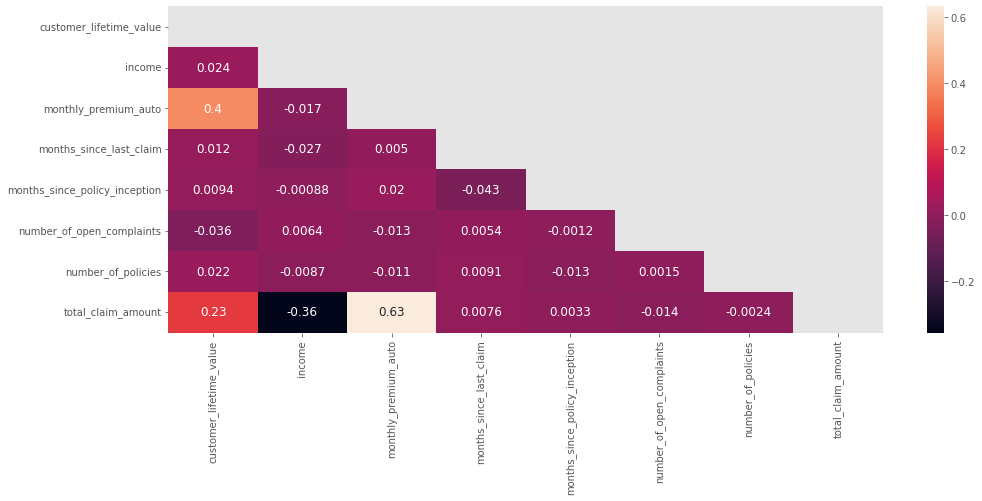

In [11]:
plt.figure(figsize=(16,6))
sns.heatmap(customer_df.corr(), annot=True, annot_kws={"size":12}, mask=mask)
plt.show()

### Plot every continuous variable

In [12]:
continuous_var = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount']

<Figure size 1152x432 with 0 Axes>

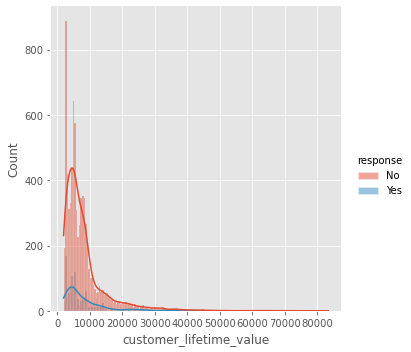

<Figure size 1152x432 with 0 Axes>

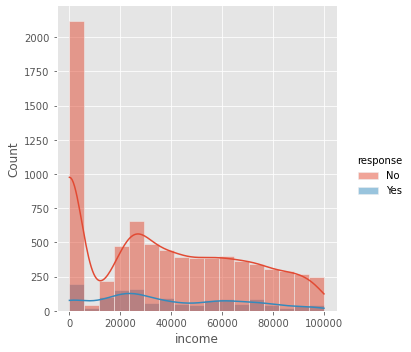

<Figure size 1152x432 with 0 Axes>

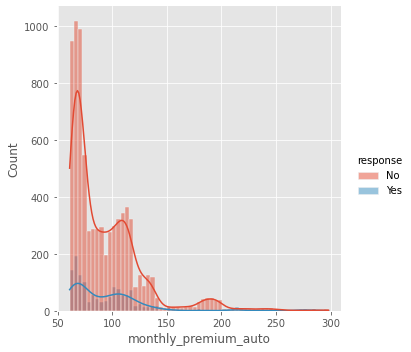

<Figure size 1152x432 with 0 Axes>

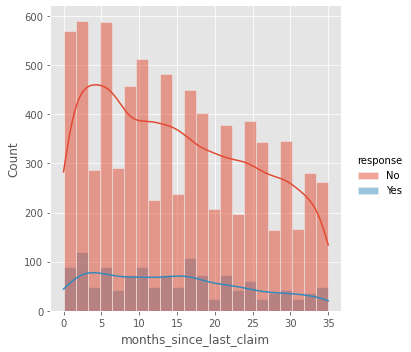

<Figure size 1152x432 with 0 Axes>

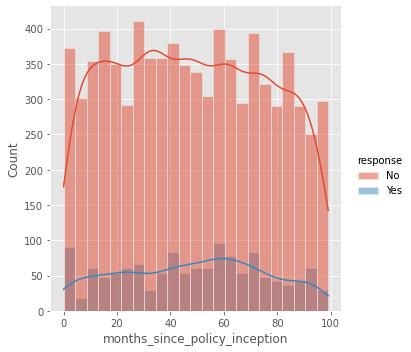

<Figure size 1152x432 with 0 Axes>

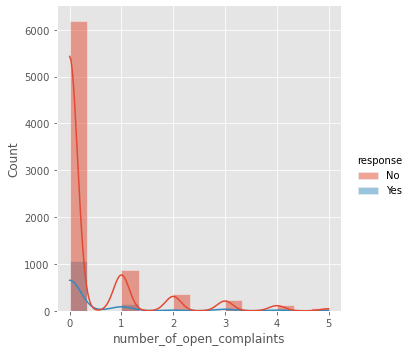

<Figure size 1152x432 with 0 Axes>

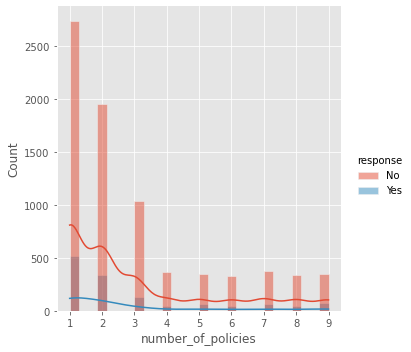

<Figure size 1152x432 with 0 Axes>

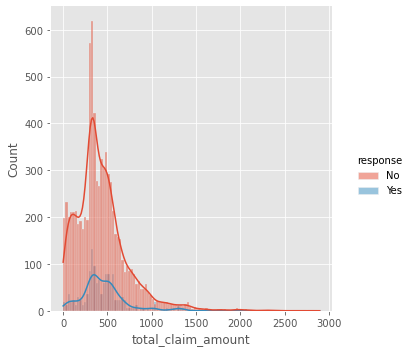

In [13]:
for var in continuous_var:
    plt.figure(figsize=(16,6))
    sns.displot(data=customer_df, x=customer_df[var], hue=customer_df['response'], kde=True)
    plt.show()

### Plot the categorical variables

In [14]:
categorical_var = customer_df.select_dtypes(object)
categorical_var.drop(columns='customer', axis=1, inplace=True)
categorical_var

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


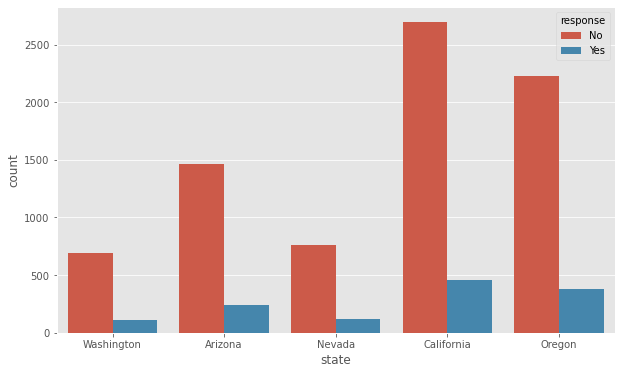

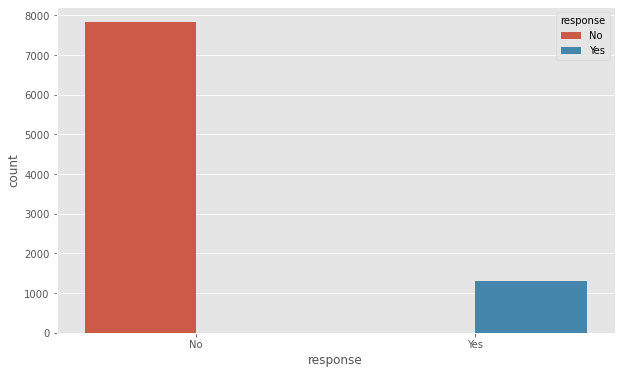

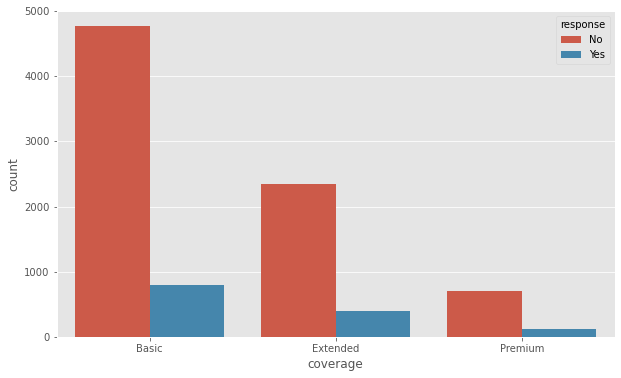

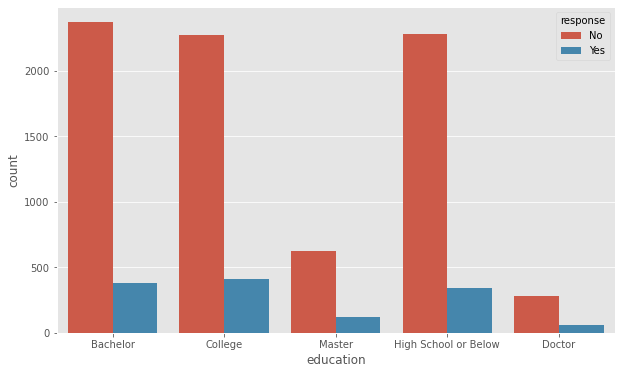

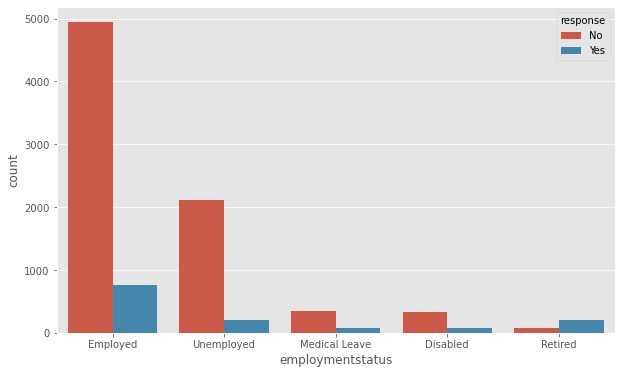

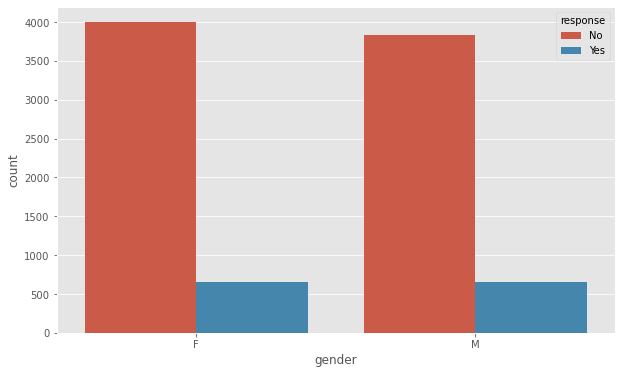

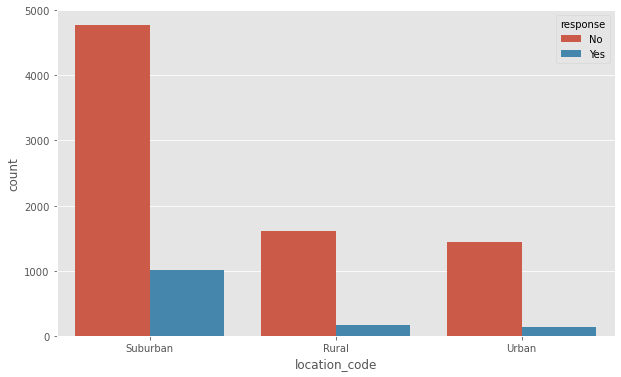

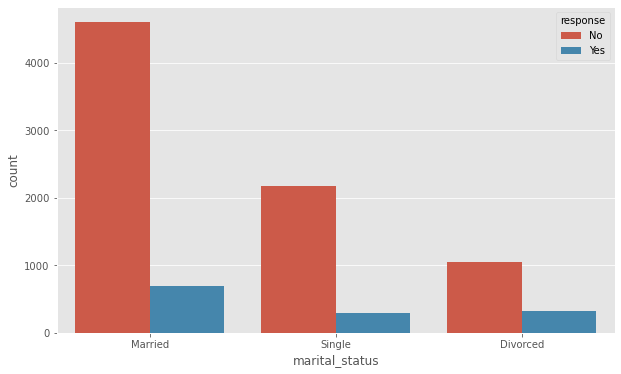

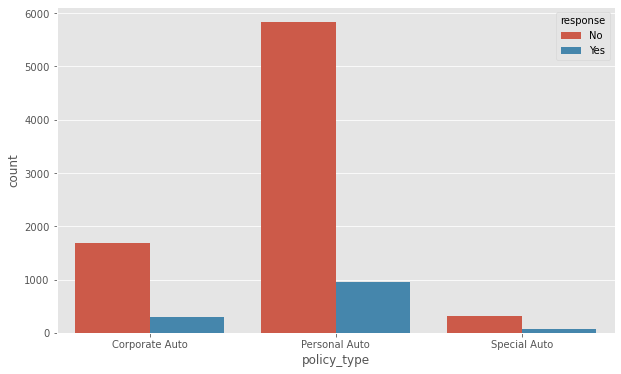

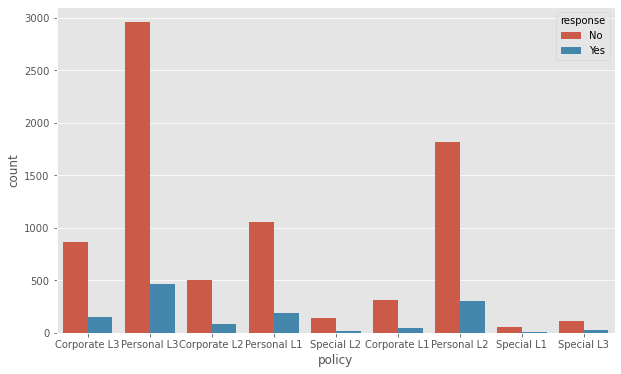

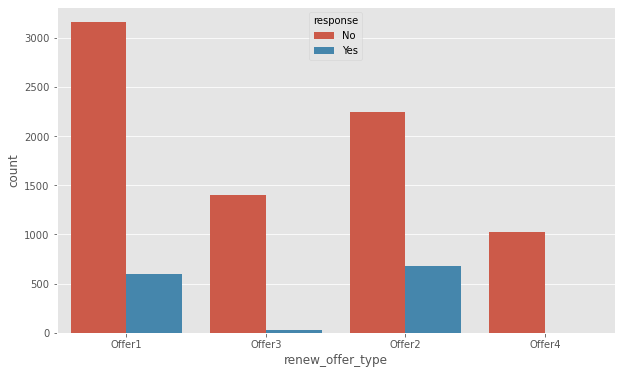

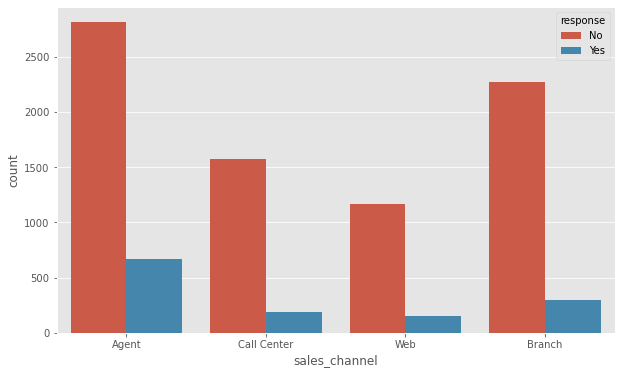

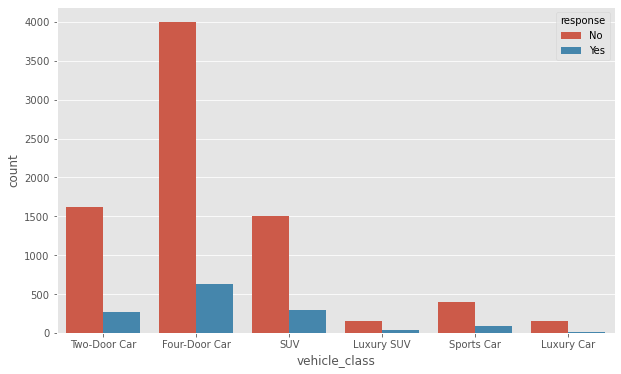

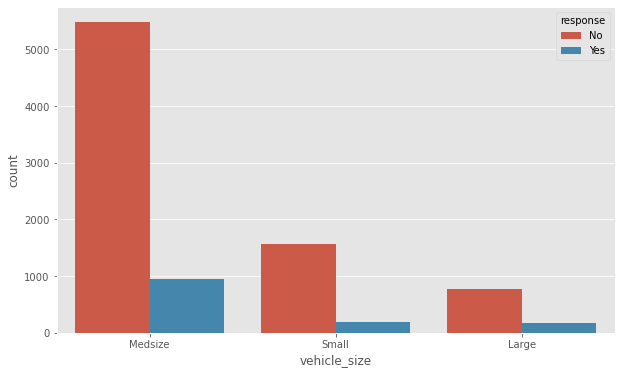

In [15]:
for var in categorical_var:
    plt.figure(figsize=(10,6))
    sns.countplot(data=customer_df, x=customer_df[var], hue=customer_df['response'])
    plt.show()

### Look for outliers in the continuous variables.

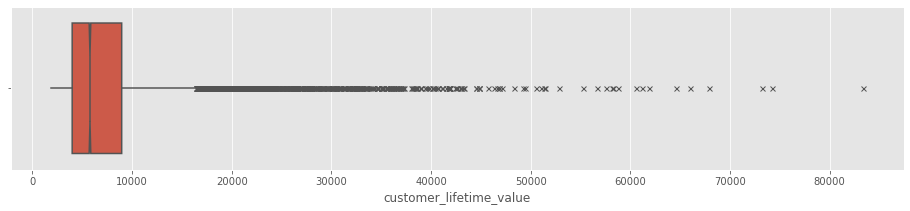

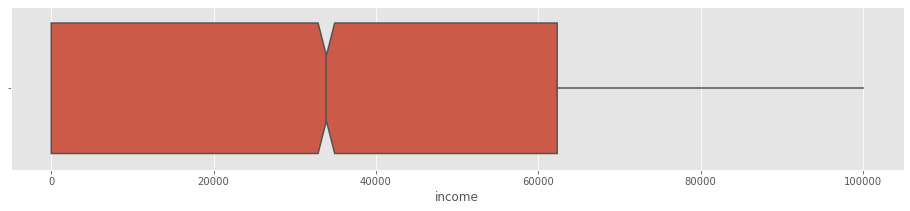

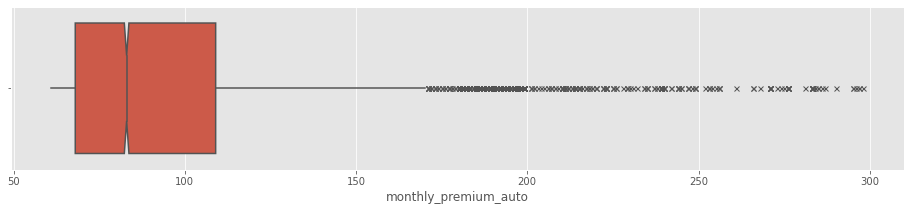

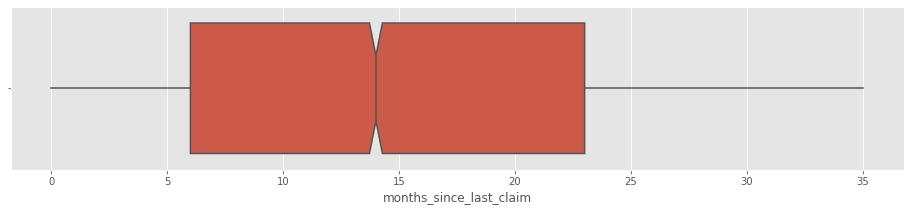

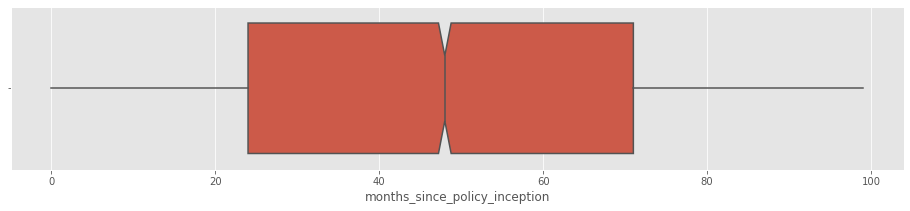

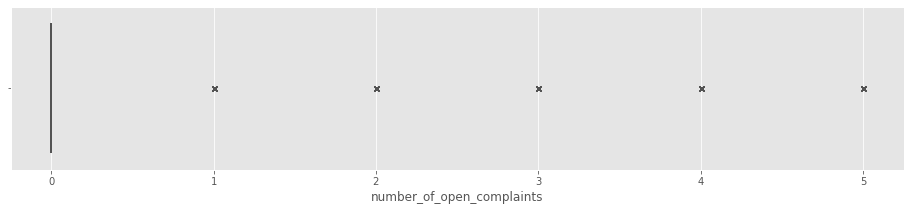

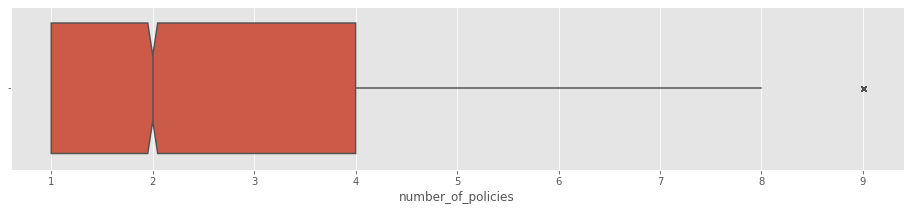

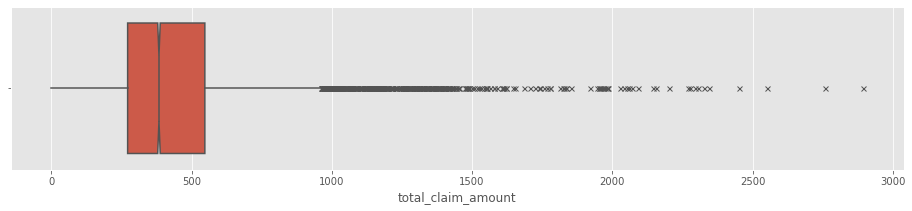

In [16]:
for var in continuous_var:
    plt.figure(figsize=(16,3))
    sns.boxplot(data=customer_df, x=customer_df[var],
                notch=True, showcaps=False,
                flierprops={"marker": "x"})
    plt.show()

### Check all columns for NaN values

In [17]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Data cleaning (categorical) - w10-d1-lab2

### Load the continuous and discrete variables

In [18]:
numerical_df = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes(object)

### Plot every categorical variable

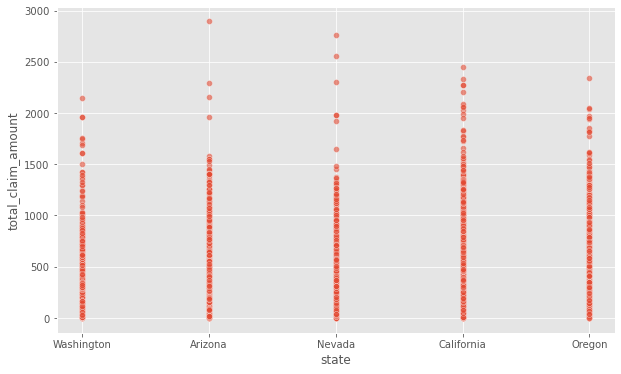

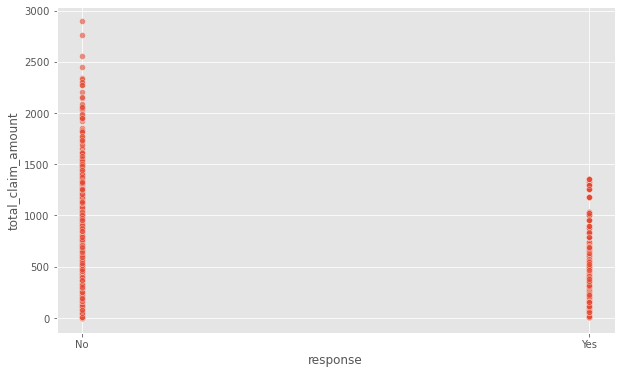

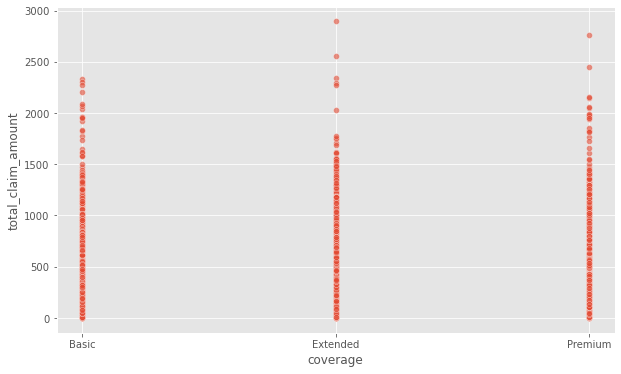

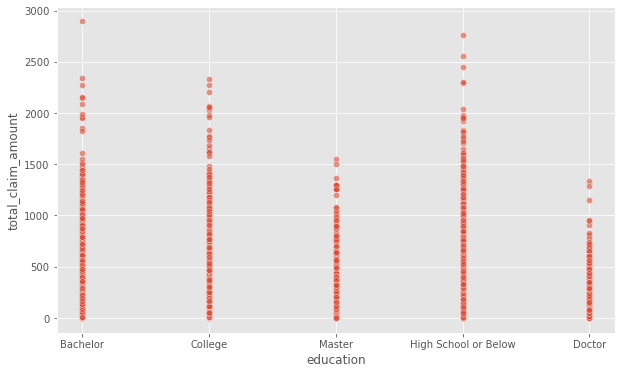

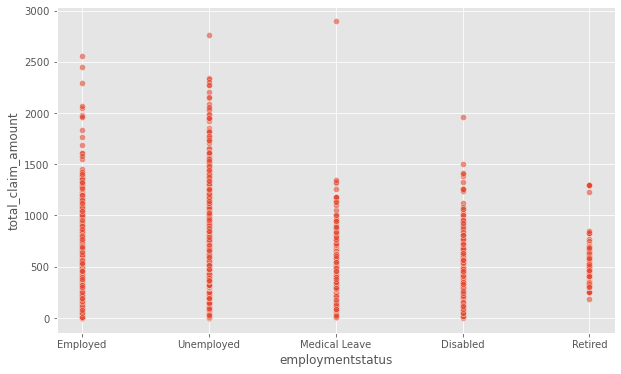

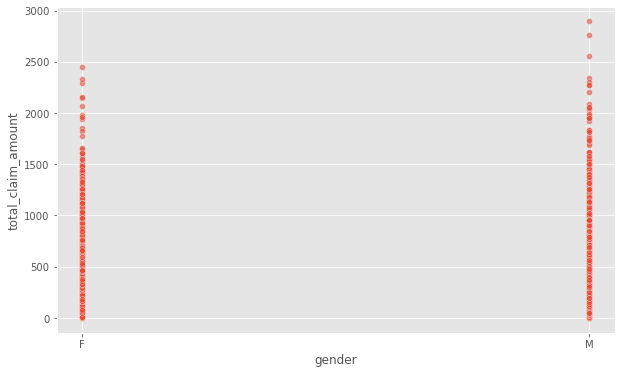

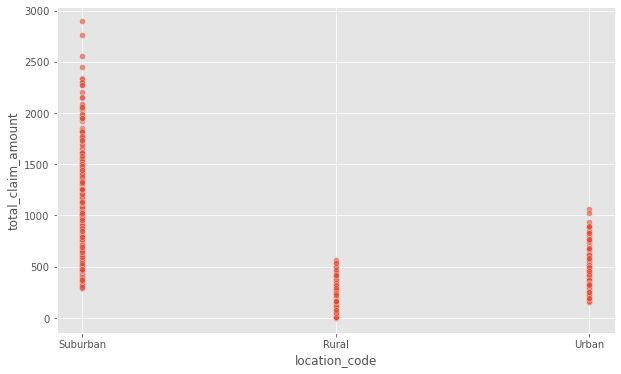

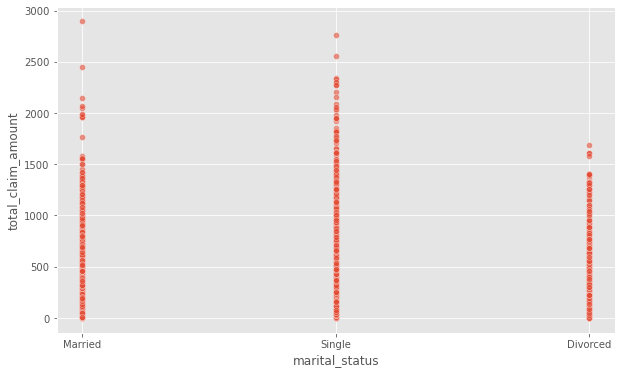

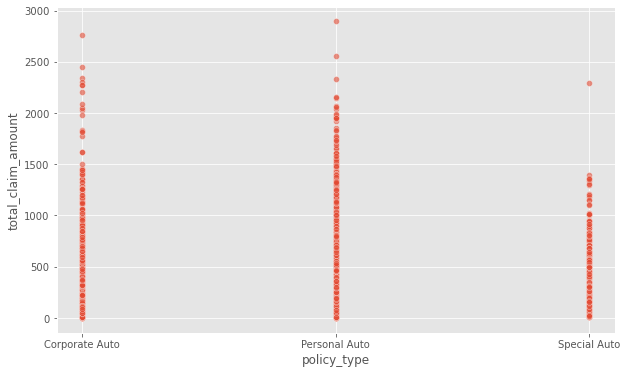

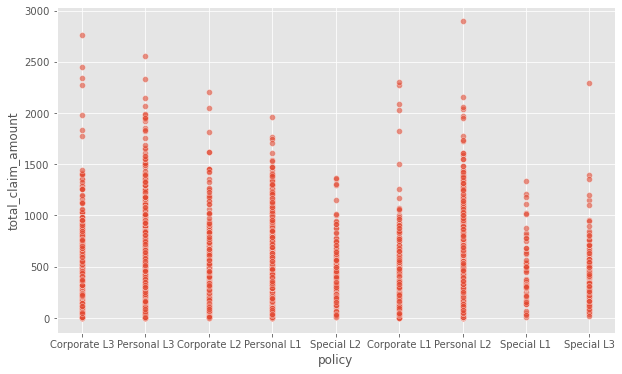

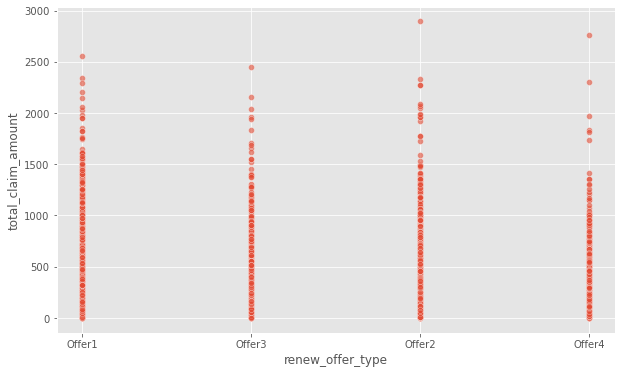

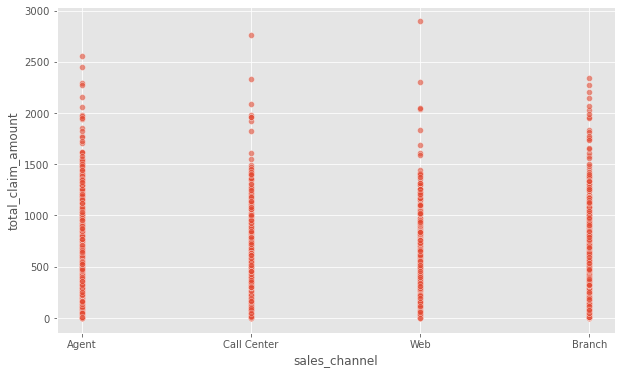

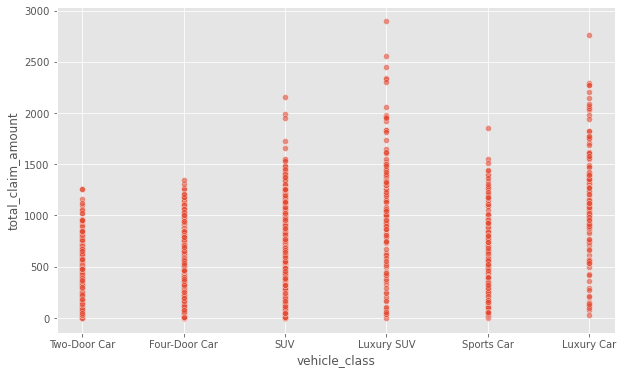

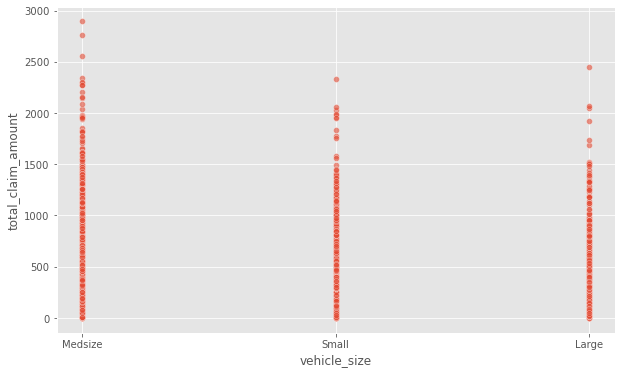

In [19]:
for var in categorical_var:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=customer_df, 
                    x=customer_df[var], y=customer_df['total_claim_amount'],
                    alpha=0.6)
    plt.show()

### For the categorical data, check if there is any data cleaning that needs to be performed

In [20]:
for var in categorical_var:
    print('\n', var.upper())
    print(customer_df[var].value_counts(dropna=False))


 STATE
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

 RESPONSE
No     7826
Yes    1308
Name: response, dtype: int64

 COVERAGE
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

 EDUCATION
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

 EMPLOYMENTSTATUS
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

 GENDER
F    4658
M    4476
Name: gender, dtype: int64

 LOCATION_CODE
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

 MARITAL_STATUS
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

 POLICY_TYPE
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, d

# Feature extraction - w10-d2-lab1

### Open the categoricals variable

In [21]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Plot all the categorical variables with the proper plot

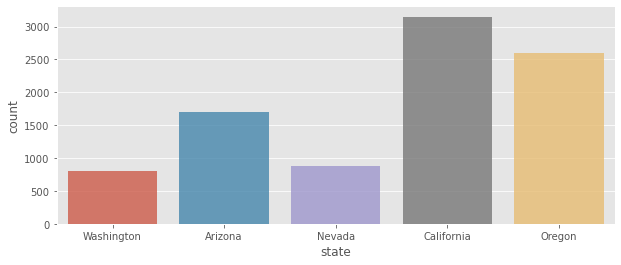

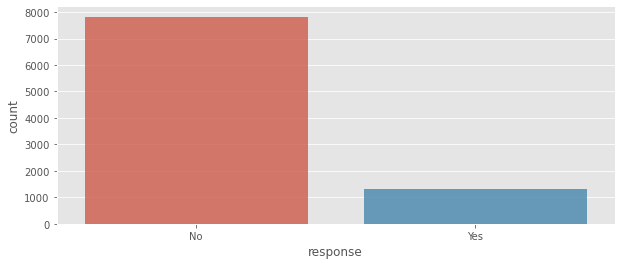

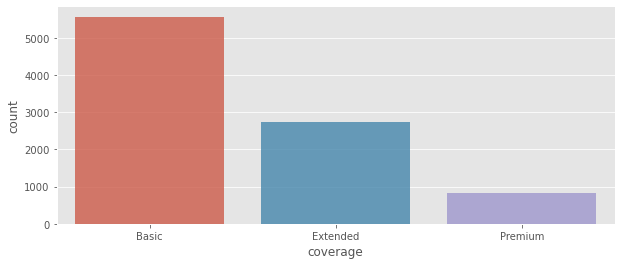

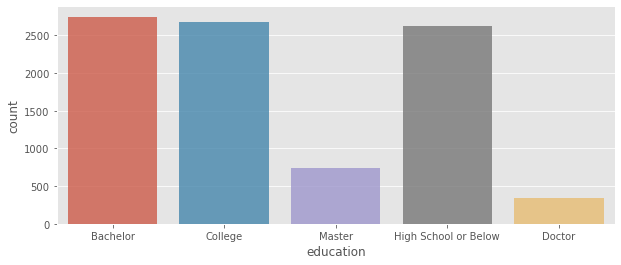

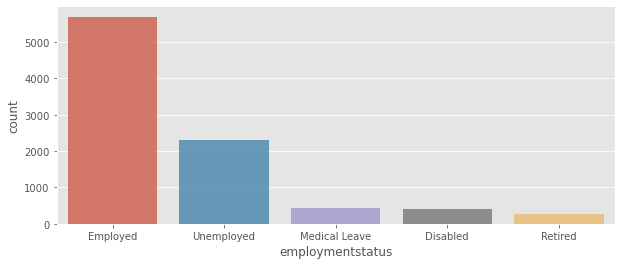

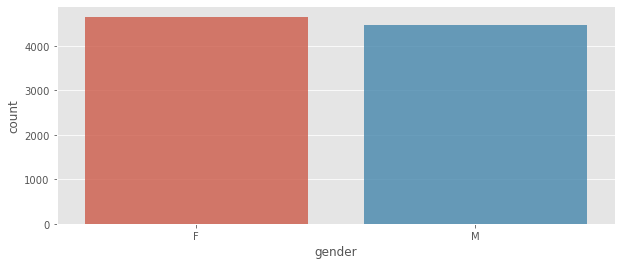

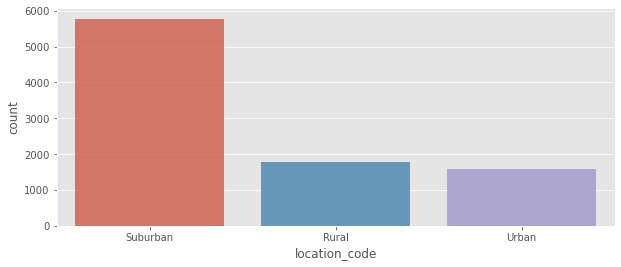

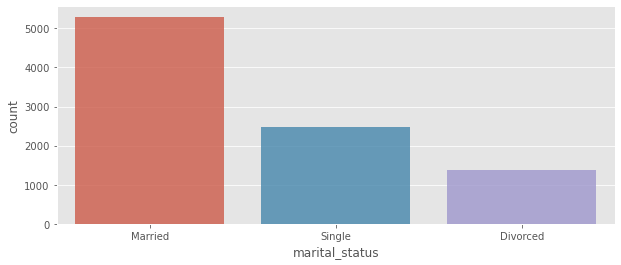

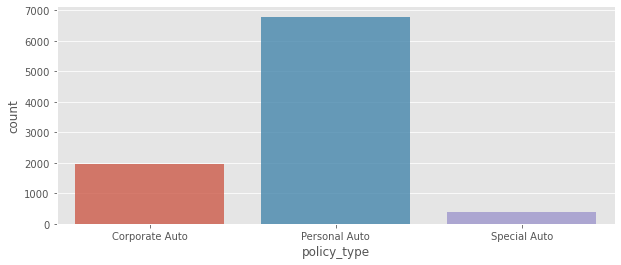

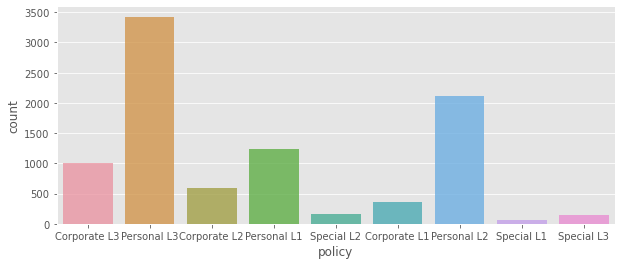

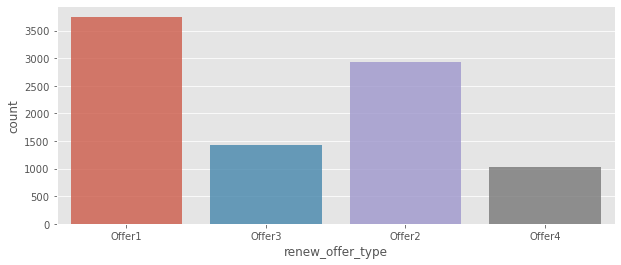

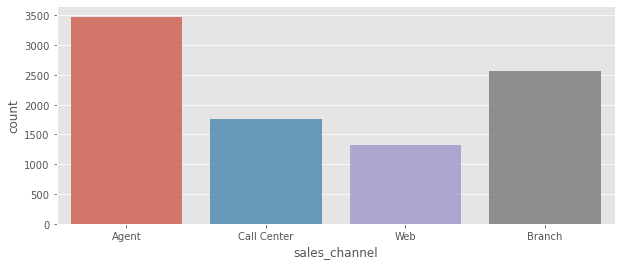

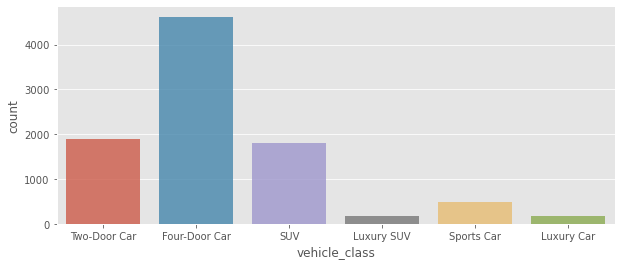

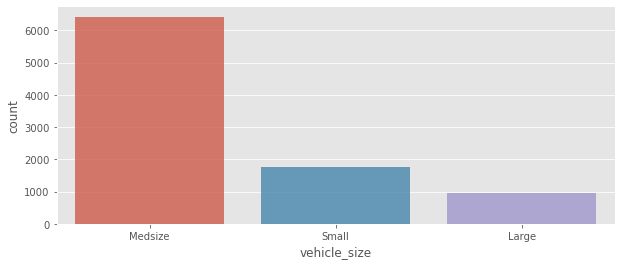

In [22]:
# plot some countings on the categorical variables. We use a barplot, each bar
# represents the count of datapoint for each unique value of the feature.
for var in categorical_var:
    plt.figure(figsize=(10,4))
    sns.countplot(data=customer_df,
                  x=customer_df[var],
                  alpha=0.8)
    plt.show()

#### SOME CONCLUSIONS:
- Except fot the gender variable, the countings are not homogeneous throughout the different unique values.
- The rate response is completely imbalanced. A lot of customers answered no to renovating their insurance with this company.

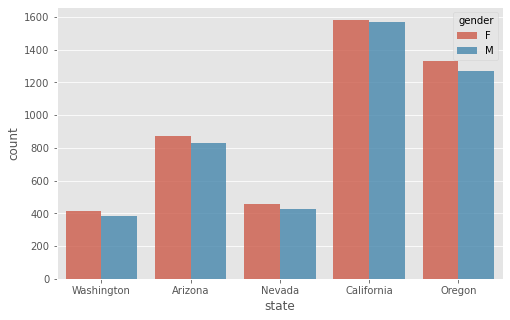

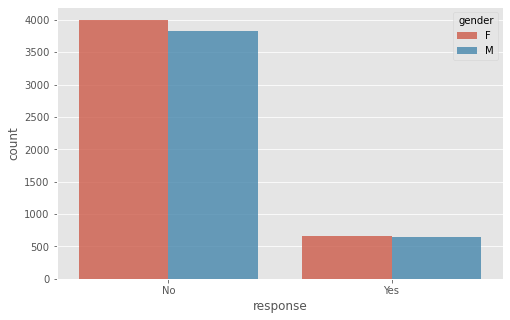

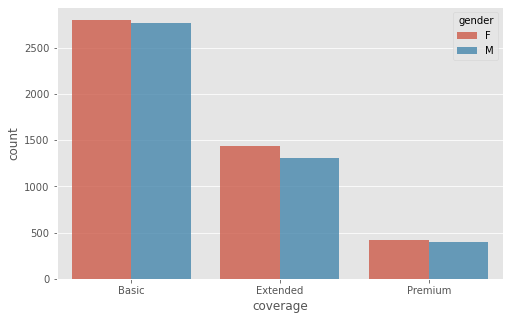

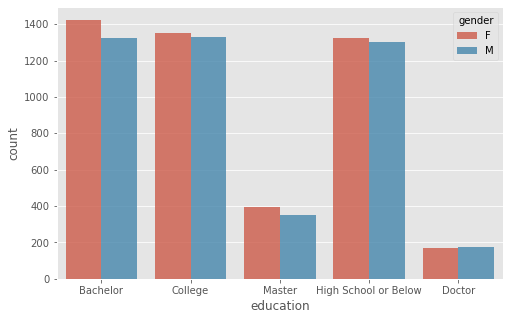

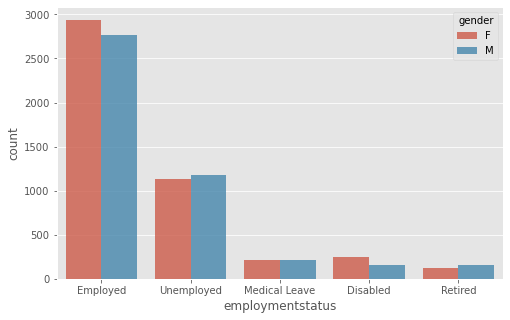

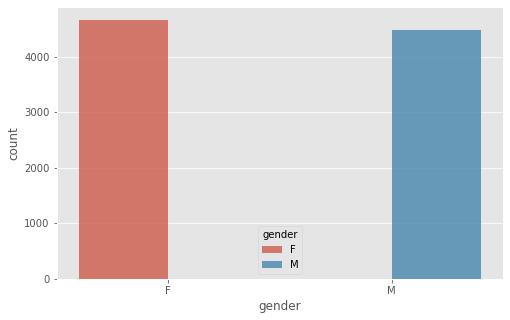

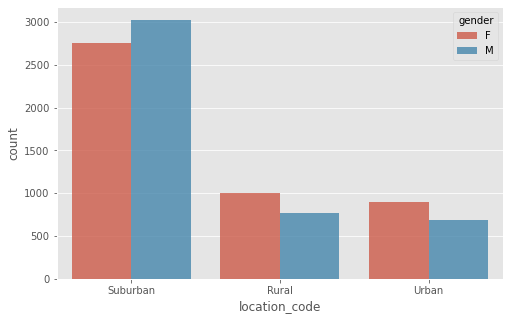

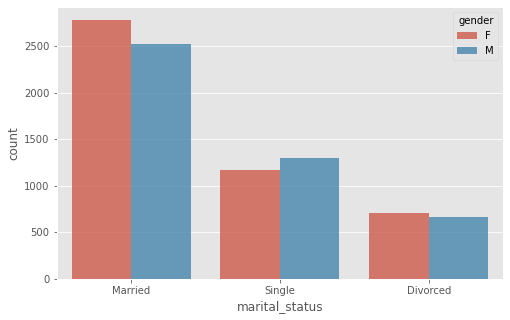

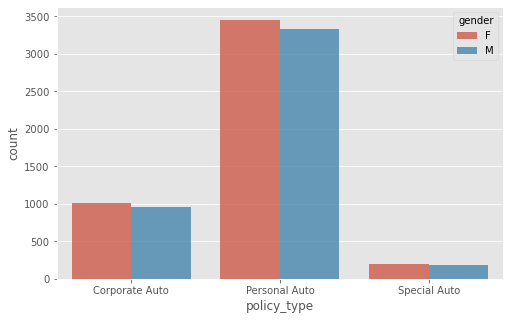

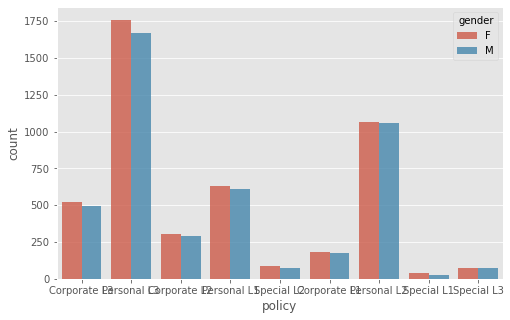

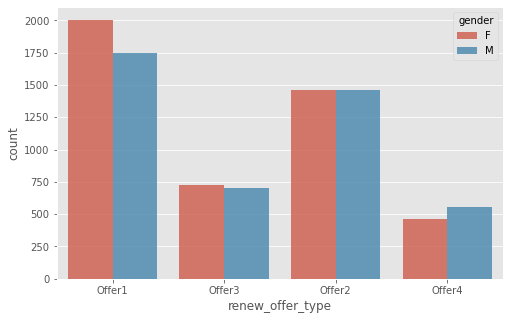

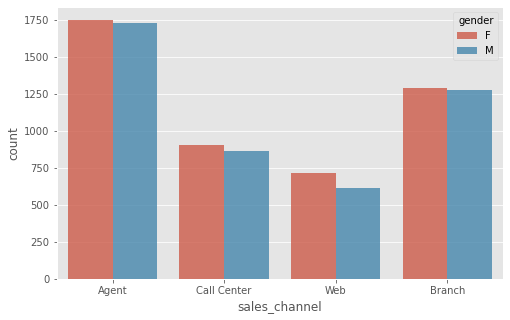

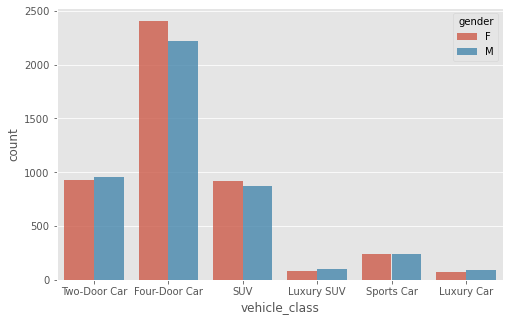

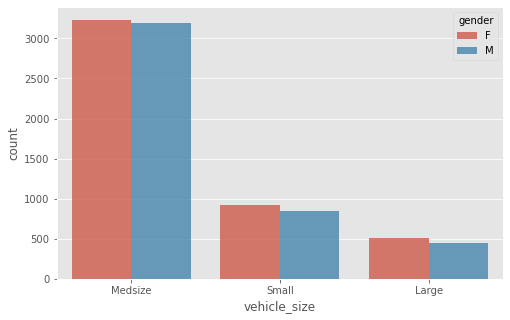

In [23]:
# We can check if there exist some relation between the categorical values and 
# the gender by adding hue to the plot.
for var in categorical_var:
    plt.figure(figsize=(8,5))
    sns.countplot(data=customer_df,
                  x=customer_df[var],
                  hue=customer_df['gender'],
                  alpha=0.8)
    plt.show()

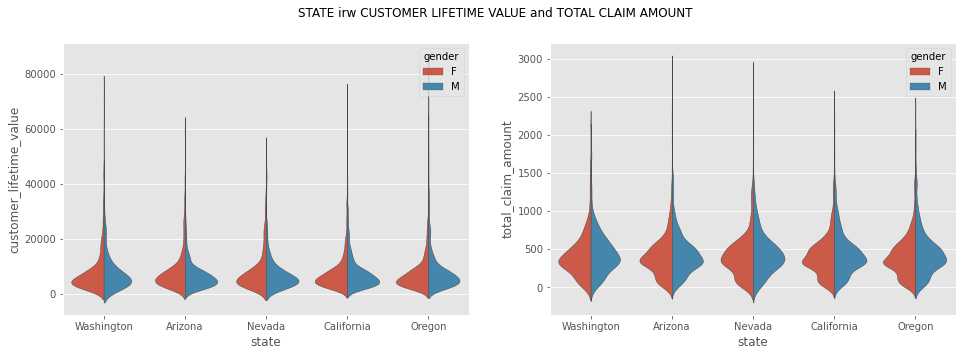

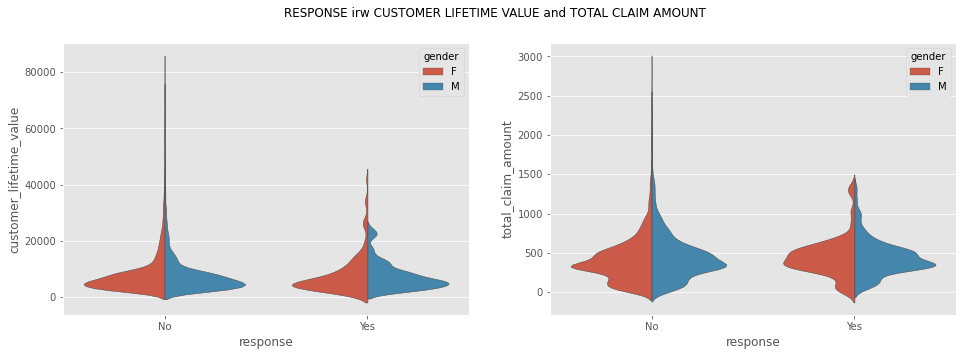

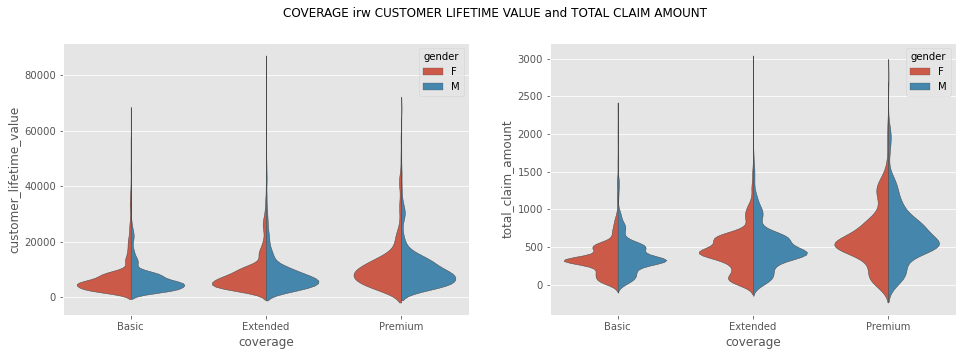

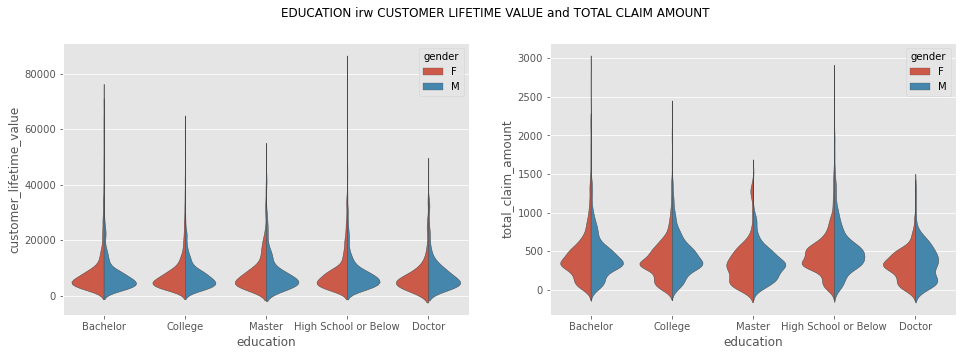

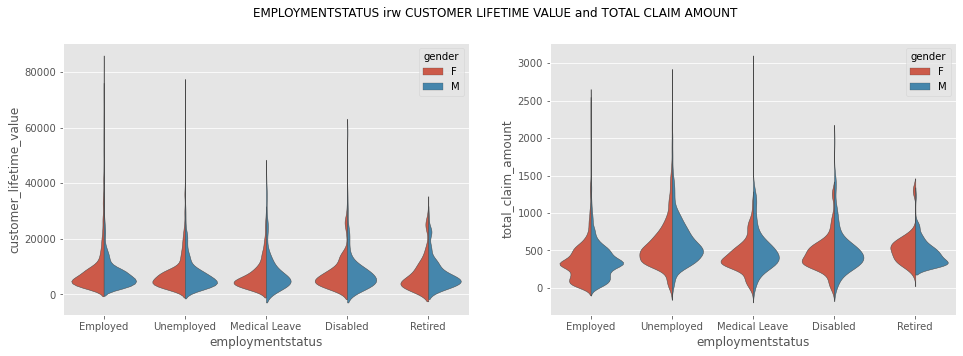

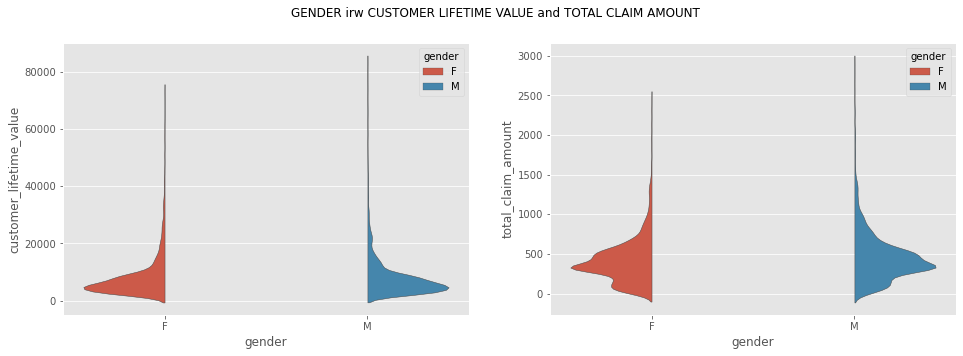

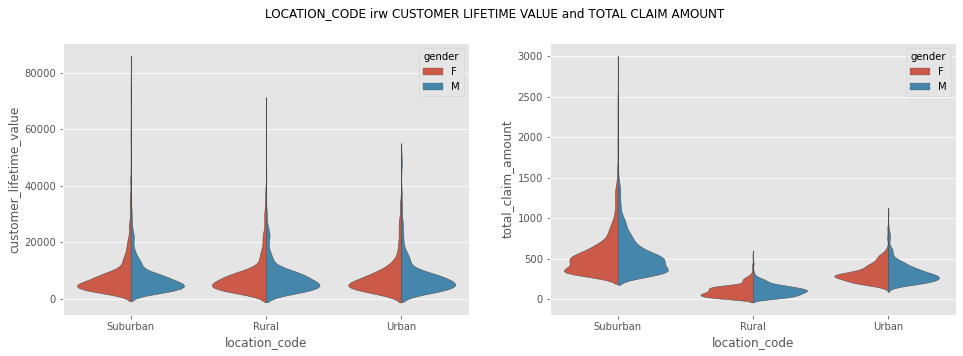

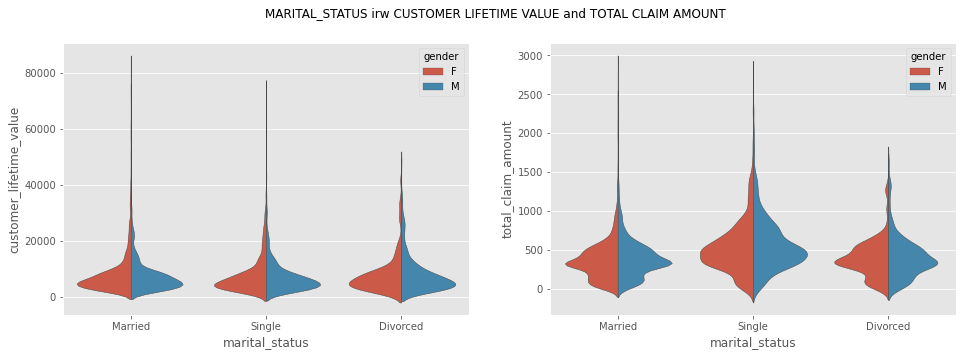

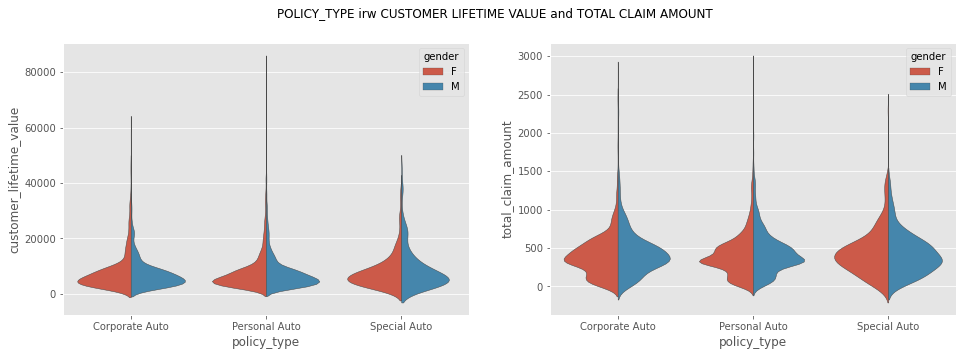

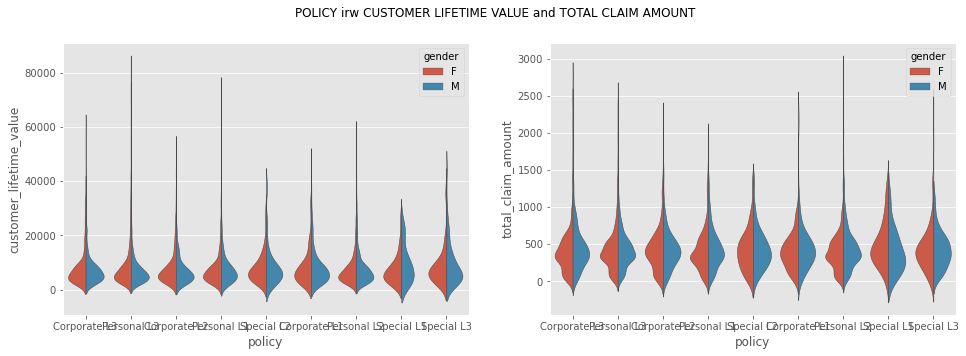

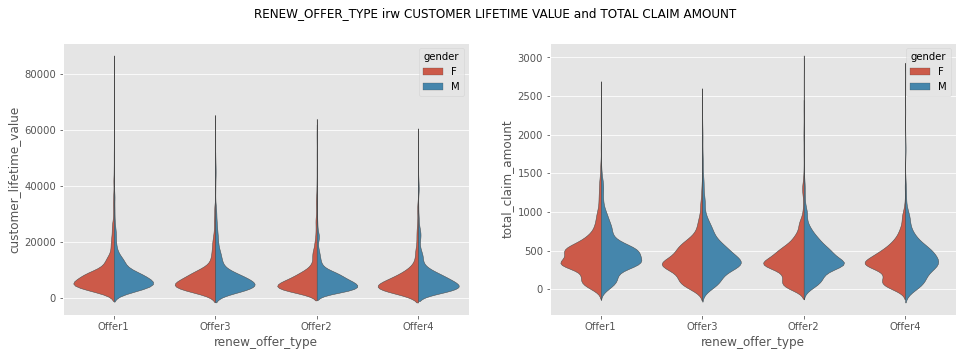

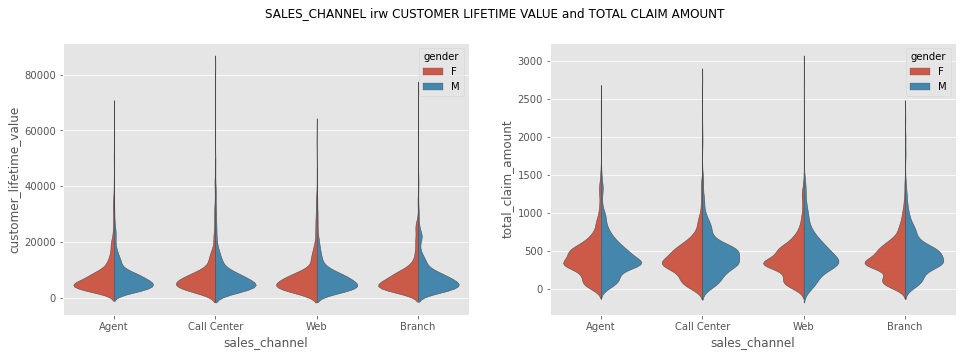

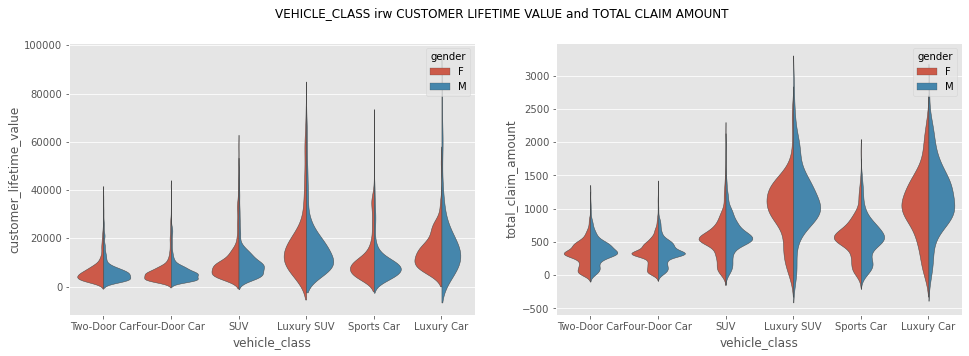

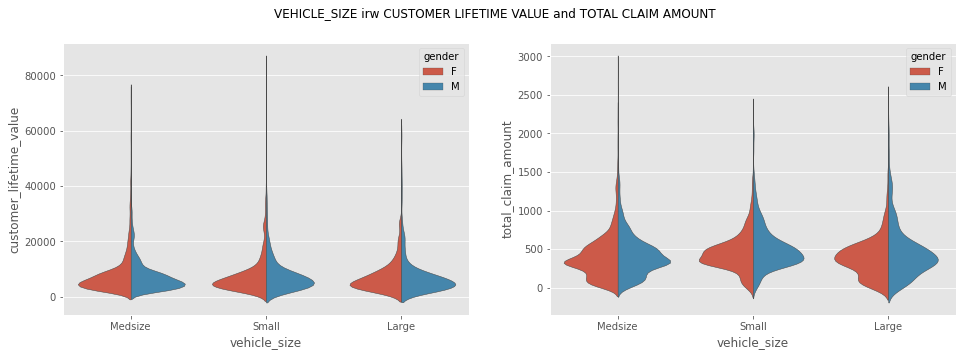

In [24]:
# Lets check for bivariate relations between the categorical values, hued by gender
# in relation with the numeric target variable: customer_lifetime_value or total_claim_amount
for var in categorical_var:
    fig, axes = plt.subplots(1, 2, figsize=(16,5))
    fig.suptitle(f'{var.upper()} irw CUSTOMER LIFETIME VALUE and TOTAL CLAIM AMOUNT')
   
    sns.violinplot(ax=axes[0],
                data=customer_df, 
                x=customer_df[var],
                y=customer_df['customer_lifetime_value'],
                hue=customer_df['gender'],
                split=True, linewidth=0.5, inner=None)
    sns.violinplot(ax=axes[1],
                data=customer_df, 
                x=customer_df[var],
                y=customer_df['total_claim_amount'],
                hue=customer_df['gender'],
                split=True, linewidth=0.5, inner=None)
    
    plt.show()

#### SOME CONCLUSIONS:  
This plot is very illuminating, because it allows us to visualize some relations between the categorical values and some target numeric variables. 
- Few categorical values seem to be related to the target variable.
- The categorical values with some kind of correlation with the target variables are:  
    - coverage, employment status, location code and vehicle class.

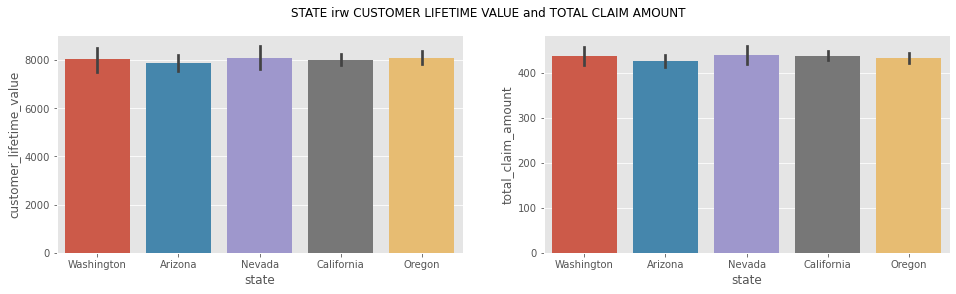

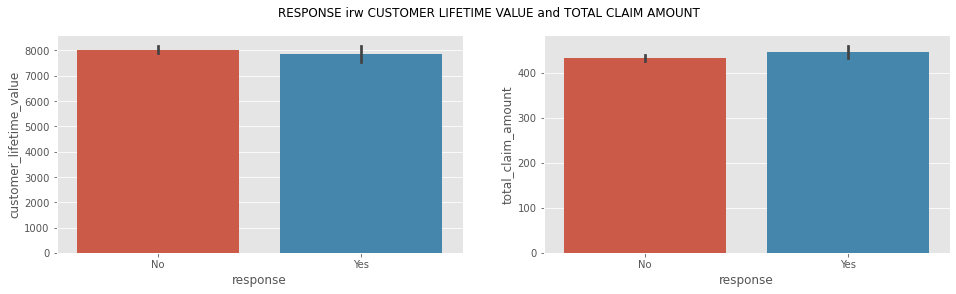

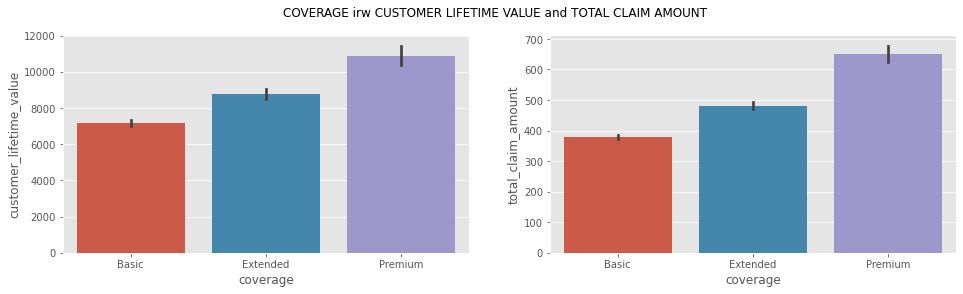

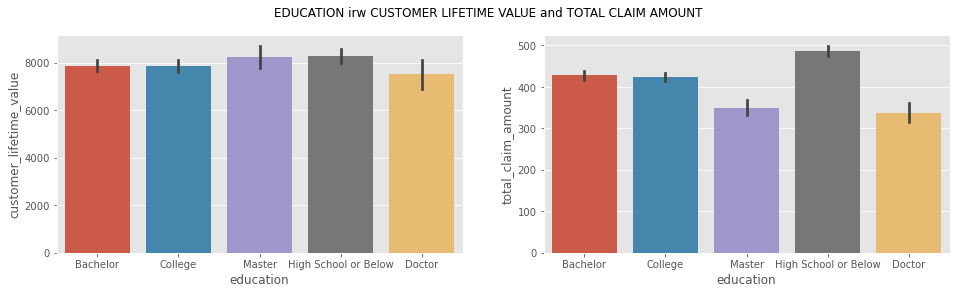

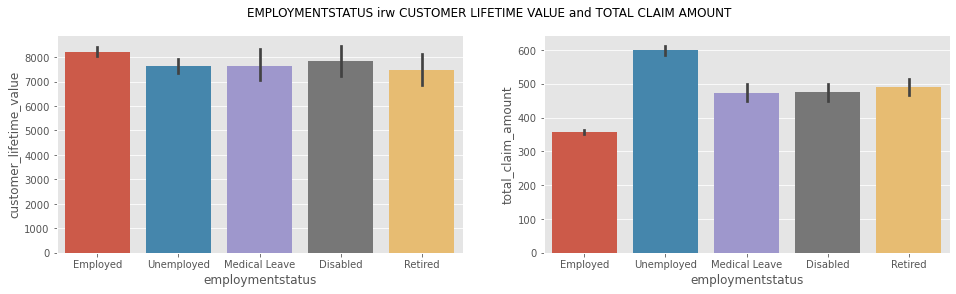

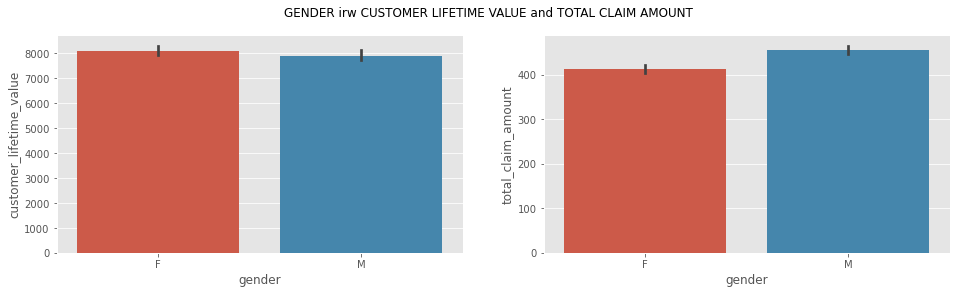

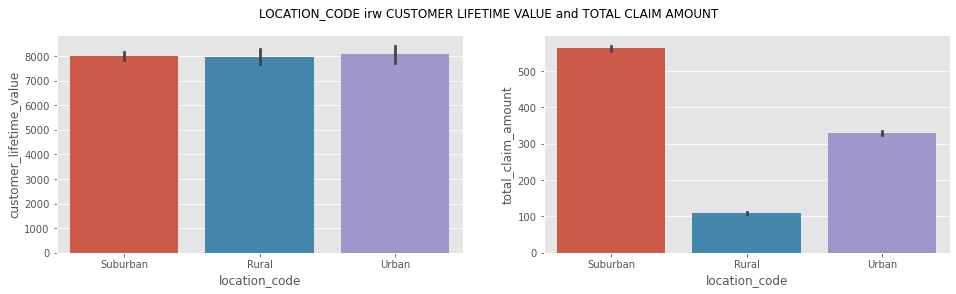

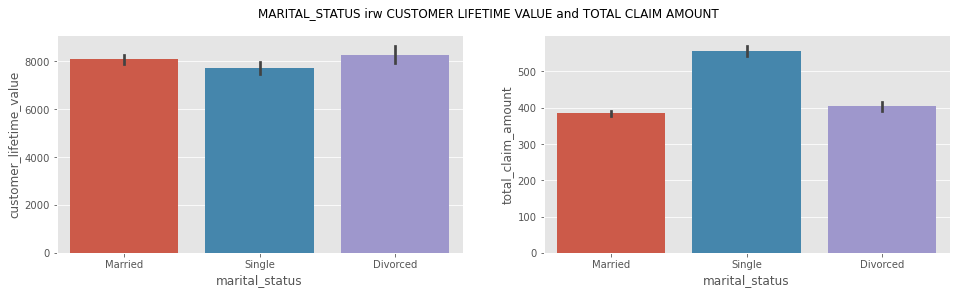

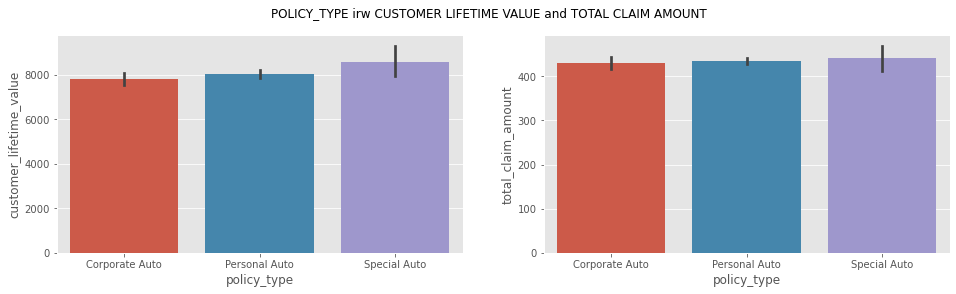

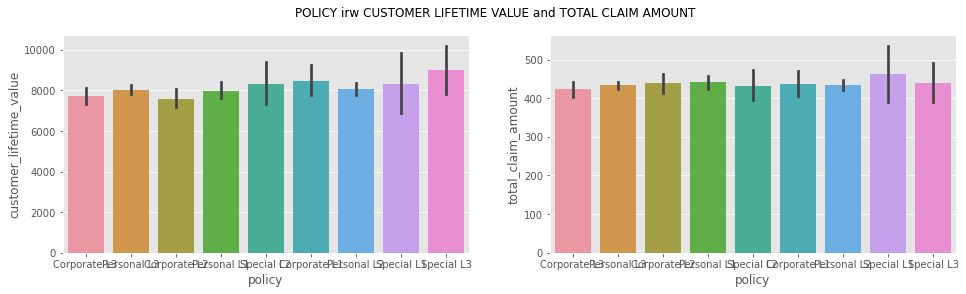

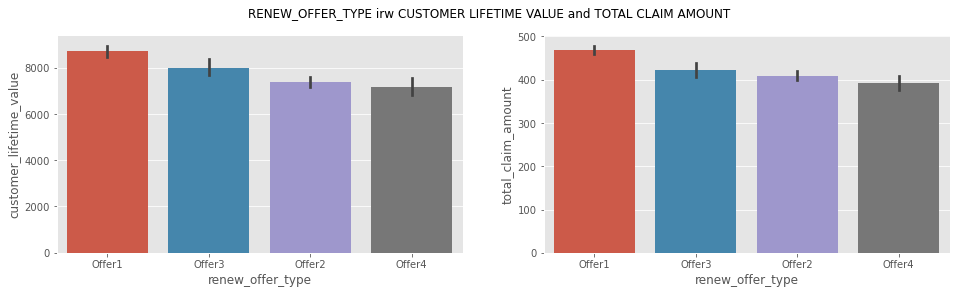

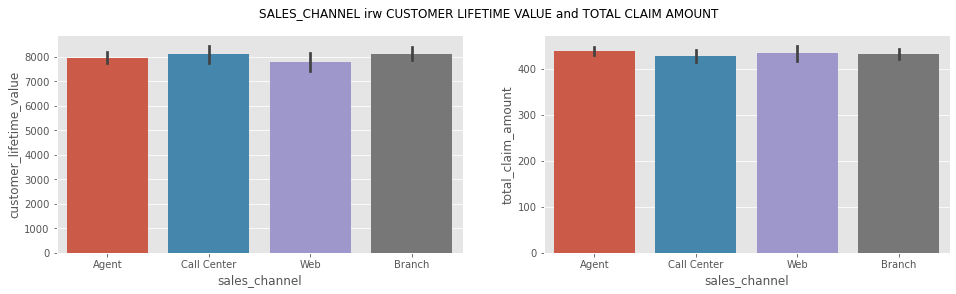

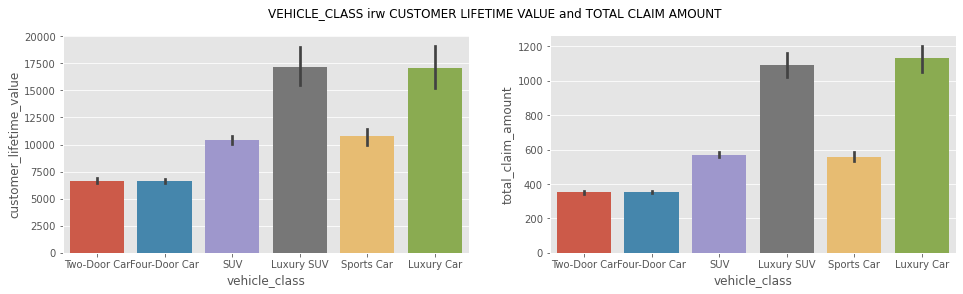

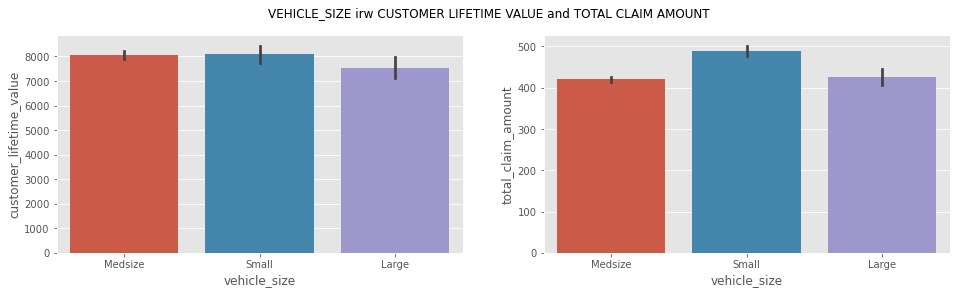

In [25]:
# we can check these correlations through the mean of each value of the categorical features irw the target
# variables. 

for var in categorical_var:
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    fig.suptitle(f'{var.upper()} irw CUSTOMER LIFETIME VALUE and TOTAL CLAIM AMOUNT')
   
    sns.barplot(ax=axes[0],
                data=customer_df, 
                x=customer_df[var],
                y=customer_df['customer_lifetime_value'])
    sns.barplot(ax=axes[1],
                data=customer_df, 
                x=customer_df[var],
                y=customer_df['total_claim_amount'])
    
    plt.show()


In [26]:
## Here we can get the average of each value for each categorical variables in relation with the target variables.
## I would have loved to see them over the bars, but couldn't find a way to do so.

#for var in categorical_var:
#    print(var.upper())
#    df = customer_df[[var, 'customer_lifetime_value']]
#    df_mean1 = df.groupby(customer_df[var].values).mean().reset_index()
#    df = customer_df[[var, 'total_claim_amount']]
#    df_mean2 = df.groupby(customer_df[var].values).mean().reset_index()
#    display(df_mean1, df_mean2)

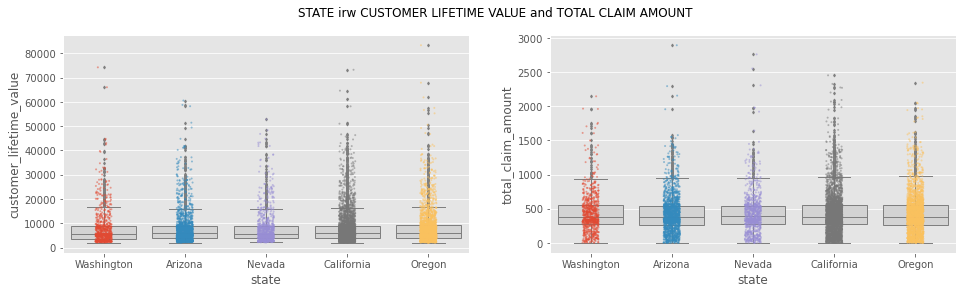

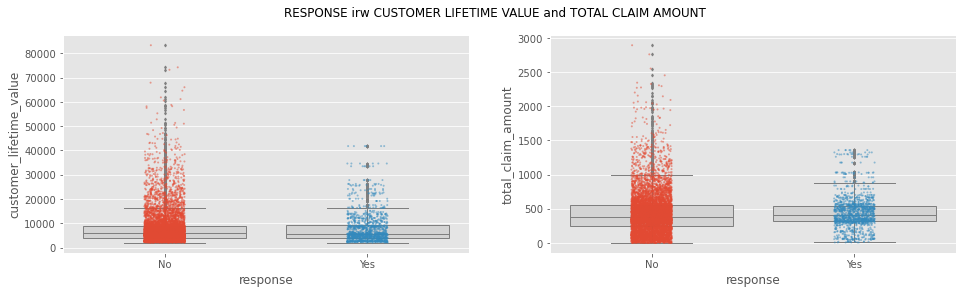

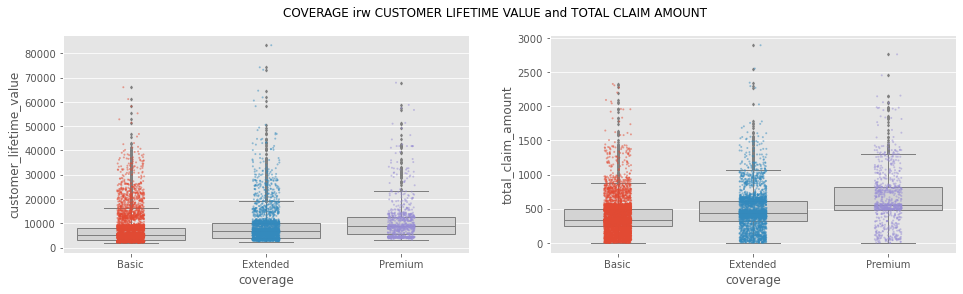

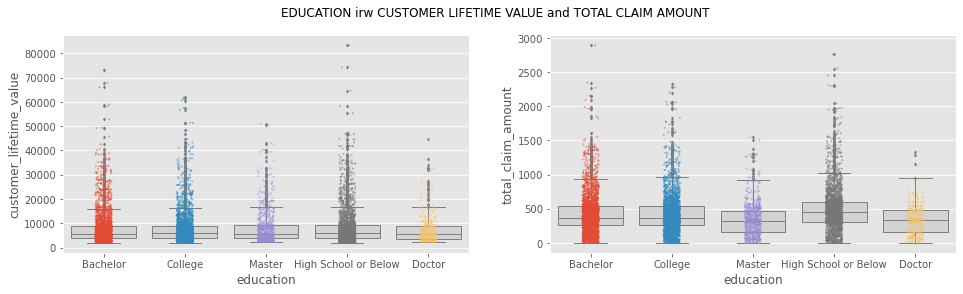

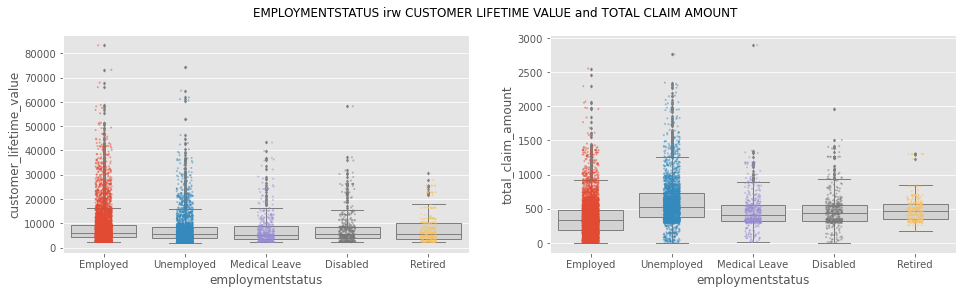

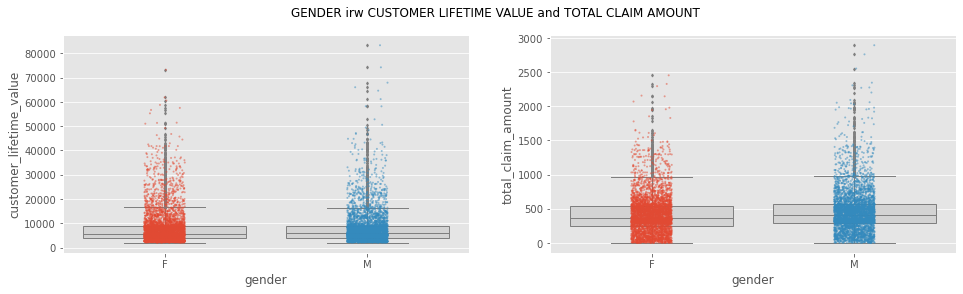

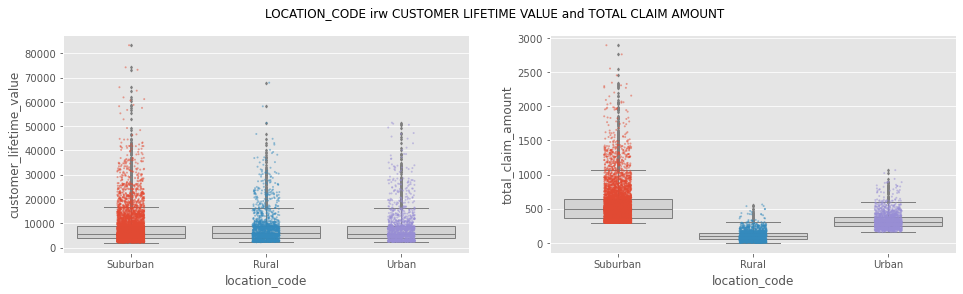

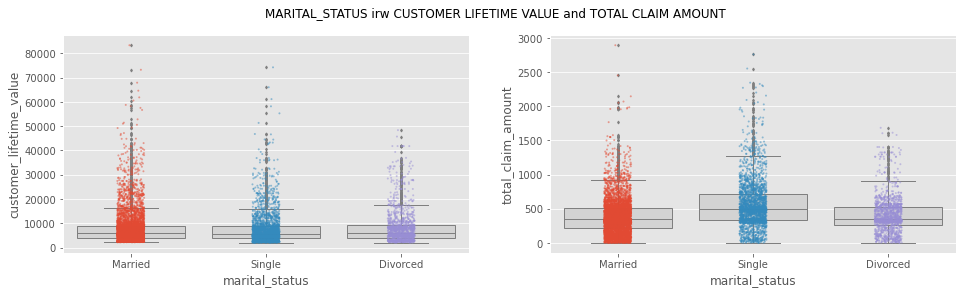

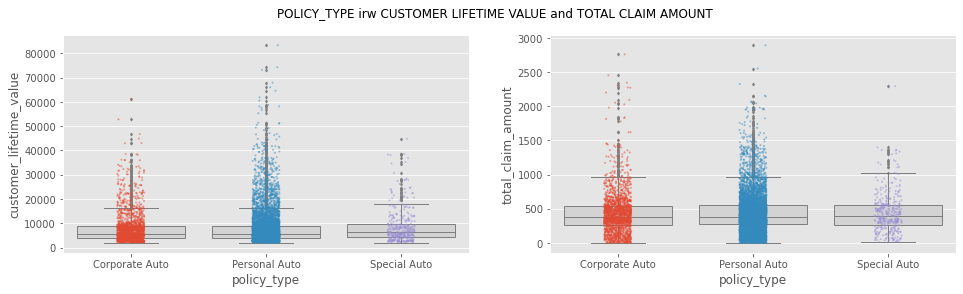

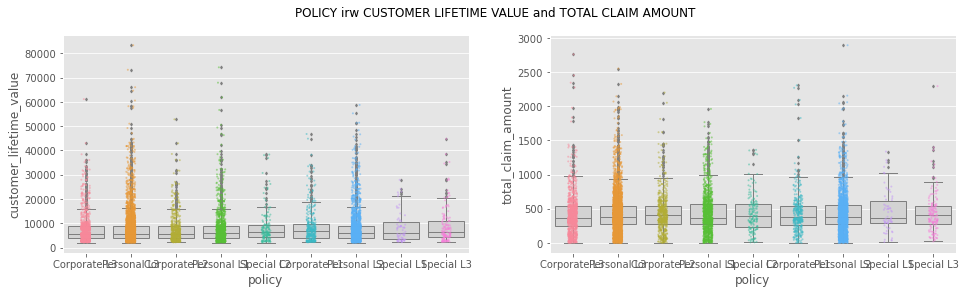

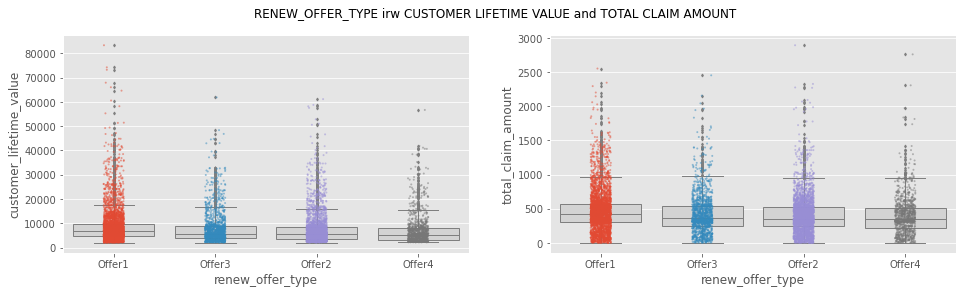

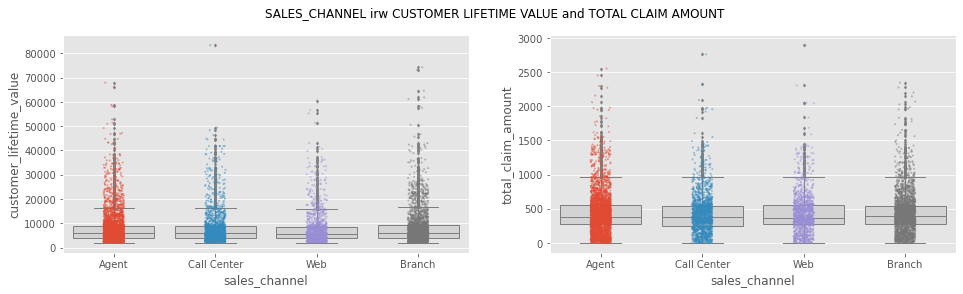

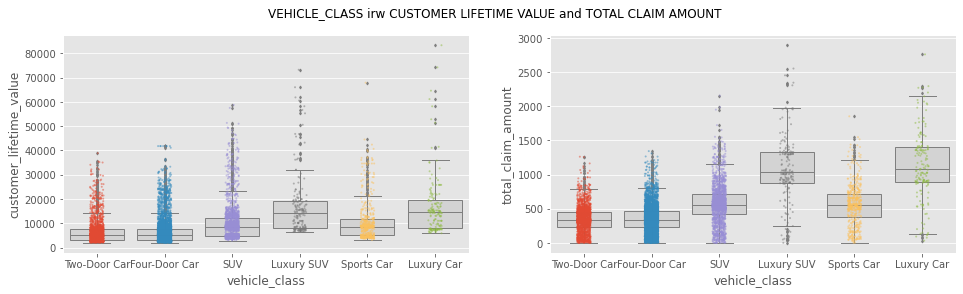

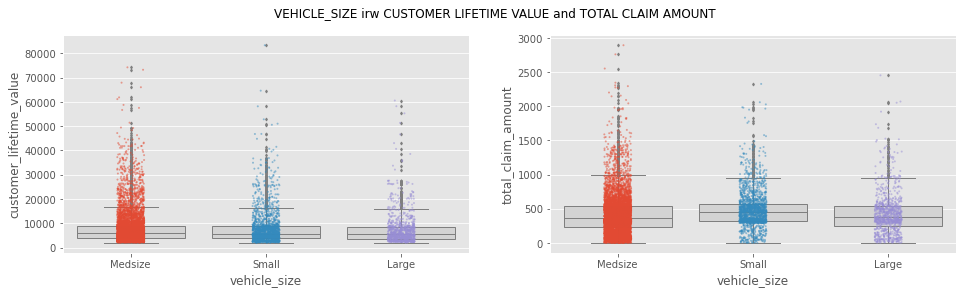

In [27]:
# Let's check for outliers in the target variables related to the categorical variables. 
for var in categorical_var:
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    fig.suptitle(f'{var.upper()} irw CUSTOMER LIFETIME VALUE and TOTAL CLAIM AMOUNT')
   
    sns.stripplot(ax=axes[0],
                  data=customer_df, 
                  x=customer_df[var],
                  y=customer_df['customer_lifetime_value'],
                  alpha=0.5, jitter=True, s=2)
    sns.boxplot(ax=axes[0],
                data=customer_df, 
                x=customer_df[var],
                y=customer_df['customer_lifetime_value'],
                color="lightgrey", fliersize=2, linewidth=1)
    
    sns.stripplot(ax=axes[1],
                  data=customer_df, 
                  x=customer_df[var],
                  y=customer_df['total_claim_amount'],
                  alpha=0.5, jitter=True, s=2)
    sns.boxplot(ax=axes[1],
                data=customer_df, 
                x=customer_df[var],
                y=customer_df['total_claim_amount'],
                color="lightgrey", fliersize=2, linewidth=1)
    
    plt.show()

### Plot time variable. Can you extract something from it?

In [28]:
customer_df['effective_to_date_year'] = customer_df['effective_to_date'].dt.year
customer_df['effective_to_date_month'] = customer_df['effective_to_date'].dt.month
customer_df['effective_to_date_day'] = customer_df['effective_to_date'].dt.day

customer_df.drop('effective_to_date', axis=1, inplace=True)

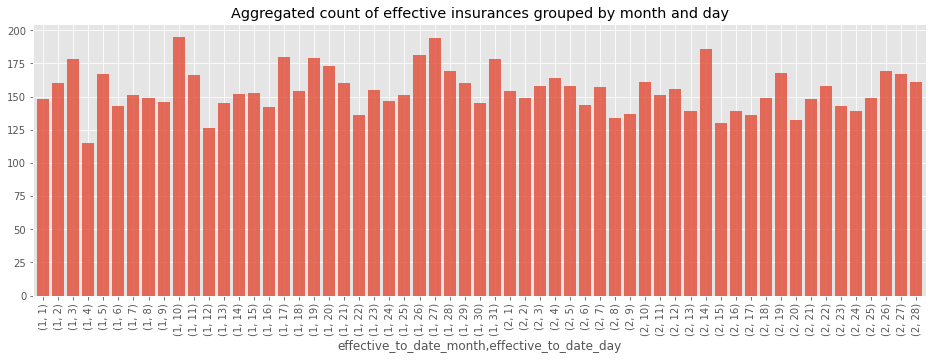

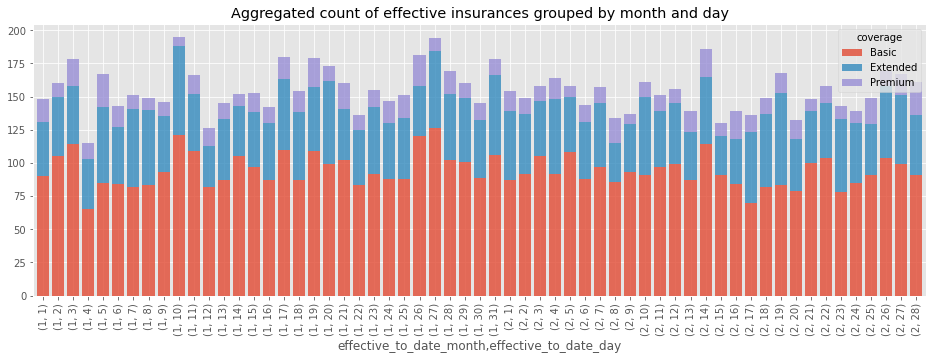

In [29]:
plt.rcParams["figure.figsize"] = (16, 5)

# plot an aggregated count of effective insurances grouped by month and day
customer_df.groupby(['effective_to_date_month', 'effective_to_date_day']).size().plot(kind='bar', width=0.8, alpha=0.8)
plt.title('Aggregated count of effective insurances grouped by month and day')
plt.show()

# plot an aggregated count of effective insurances grouped by month and day
customer_df.groupby(['effective_to_date_month', 'effective_to_date_day', 'coverage']).size().unstack().plot(kind='bar', stacked=True, width=0.8, alpha=0.8)
plt.title('Aggregated count of effective insurances grouped by month and day')
plt.show()

# Cleaning and wrangling - w10-d2-lab2

### Remove outliers from numerical features

#### Plotting Box-Wisker plots

In [30]:
from scipy.stats import skew # cheking for skewness

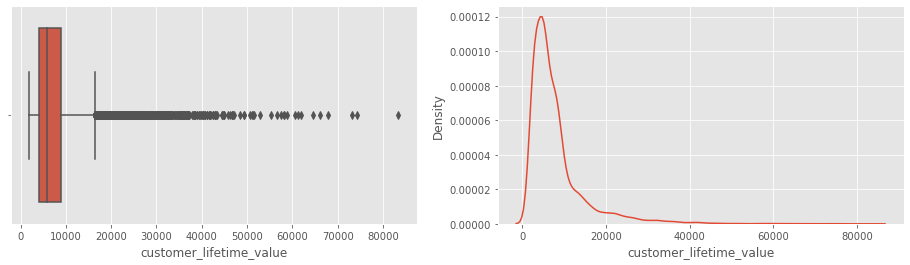

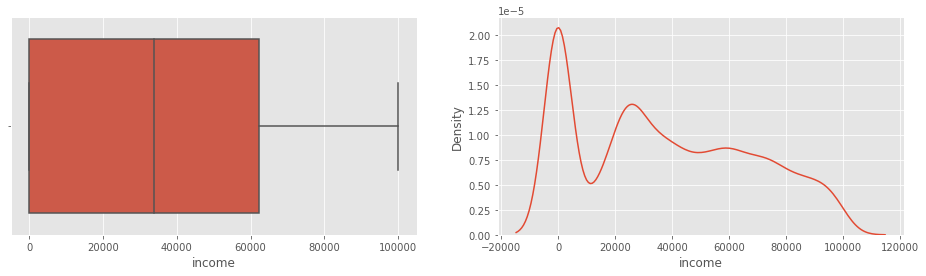

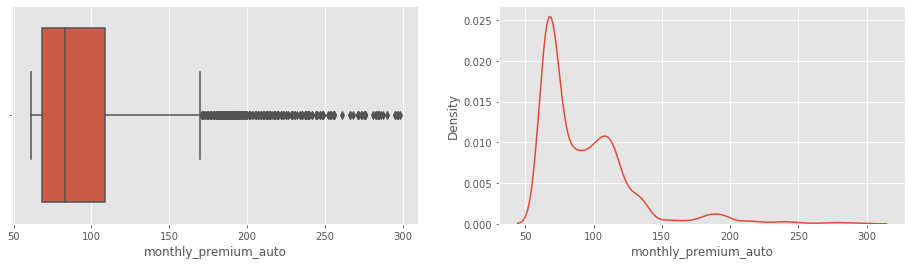

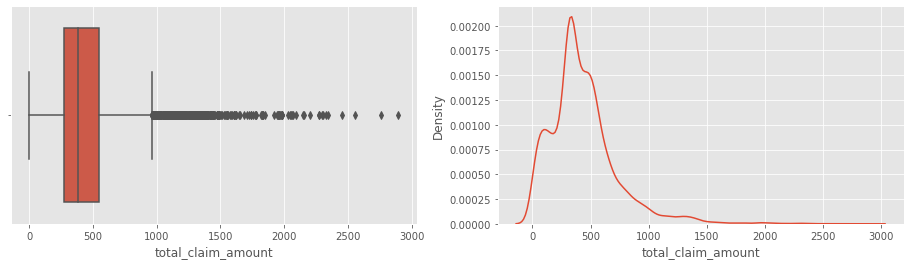

In [31]:
# I will remove outliers from the continuos data, i.e: 
# customer_lifetime_value, income, monthly_premium_auto, total_claim_amount

for col in customer_df[['customer_lifetime_value', 
                        'income', 
                        'monthly_premium_auto', 
                        'total_claim_amount']]:    
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    sns.boxplot(ax=axes[0], x=numerical_df[col])
    sns.kdeplot(ax=axes[1], x=numerical_df[col])
    plt.show()


In [32]:
# define some functions to run over multiple columns

# asserting iqr percentiles
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

# checking for outliers
def check_outliers_iqr(dataframe, col_name):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else: 
        return False

# let's do it    
def replace_with_thresholds_iqr(dataframe, cols, th1=0.05, th3=0.95, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_iqr(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name, th1, th3)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace: 
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe, col_name)
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)
    




In [33]:
# we will remove only the ones that are off the 0.10 and 0.90.

replace_with_thresholds_iqr(customer_df, ['customer_lifetime_value', 
                                           'income', 
                                           'monthly_premium_auto', 
                                           'total_claim_amount'], th1=0.1, th3=0.9)


Removing Outliers using IQR
=======================  ==========  =======  =======================  =============  =============
Outliers (Previously)    Outliers      Count  Column                     Lower Limit    Upper Limit
=======================  ==========  =======  =======================  =============  =============
True                     True            114  customer_lifetime_value       -16495.7        34590.8
False                    False                income                         -123155         205259
True                     True             93  monthly_premium_auto             -33.5          226.5
True                     True             38  total_claim_amount            -899.938        1777.46
=======================  ==========  =======  =======================  =============  =============


In [34]:
replace_with_thresholds_iqr(customer_df, ['customer_lifetime_value', 
                                           'income', 
                                           'monthly_premium_auto', 
                                           'total_claim_amount'], th1=0.1, th3=0.9,
                                            replace=True)

Removing Outliers using IQR
=======================  ==========  =======  =======================  =============  =============
Outliers (Previously)    Outliers      Count  Column                     Lower Limit    Upper Limit
=======================  ==========  =======  =======================  =============  =============
True                     True            114  customer_lifetime_value       -16495.7        34590.8
False                    False                income                         -123155         205259
True                     True             93  monthly_premium_auto             -33.5          226.5
True                     True             38  total_claim_amount            -899.938        1777.46
=======================  ==========  =======  =======================  =============  =============


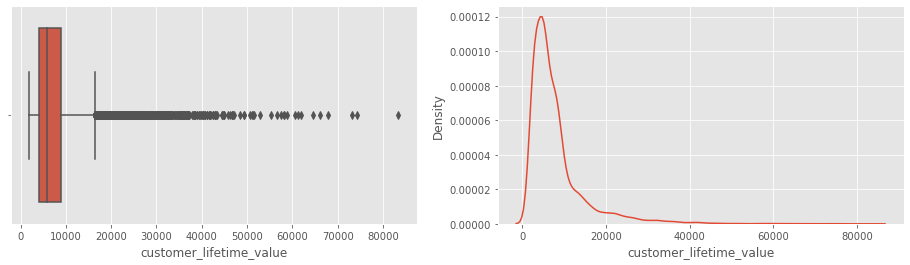

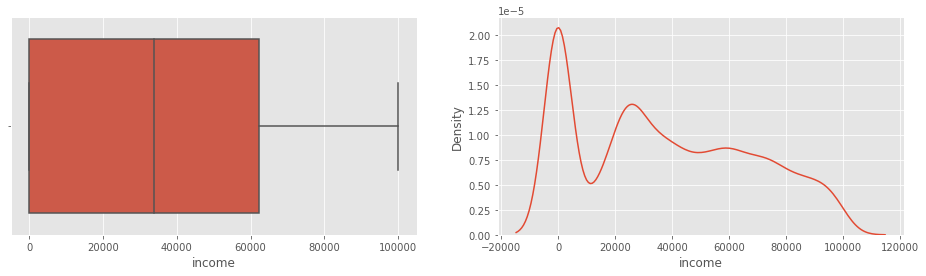

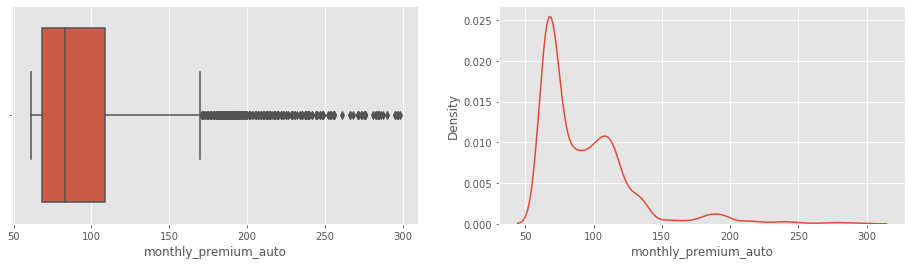

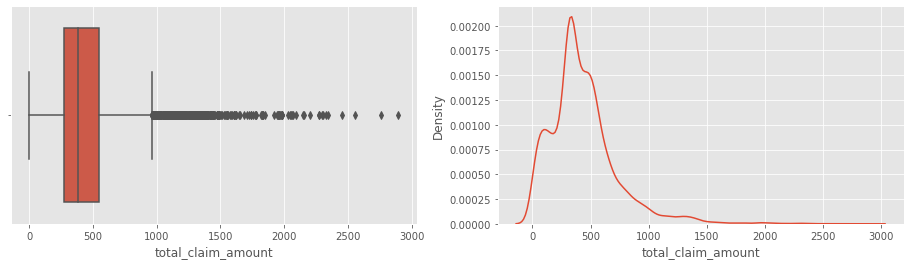

In [35]:
for col in customer_df[['customer_lifetime_value', 
                        'income', 
                        'monthly_premium_auto', 
                        'total_claim_amount']]:    
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    sns.boxplot(ax=axes[0], x=numerical_df[col])
    sns.kdeplot(ax=axes[1], x=numerical_df[col])
    plt.show()


### Create a copy of the dataframe for the data wrangling

### Normalize the continuous variables

### Encode the categorical variables

In [36]:
categorical_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [37]:
for column in categorical_df.columns:
    print(column.upper())
    print(categorical_df[column].value_counts())
    print('--------\n')

CUSTOMER
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
--------

STATE
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
--------

RESPONSE
No     7826
Yes    1308
Name: response, dtype: int64
--------

COVERAGE
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
--------

EDUCATION
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
--------

EMPLOYMENTSTATUS
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
--------

GENDER
F    4658
M    4476
Name: gender, dtype: int64
--------

LOCATION_CODE
Suburban    5779
Rural       1773
Urban 

In [38]:
state_map = {"California" : 0, "Oregon" : 1, "Arizona" : 2, "Nevada" : 3, "Washington": 4}

response_map = {"No" : 0, "Yes" : 1}

coverage_map = {"Basic" : 0, "Extended" : 1, "Premium" : 2}

education_map = {"Bachelor" : 0, "College" : 1, "High School or Below" : 2, "Master" : 3, "Doctor": 4}

employmentstatus_map = {"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired": 4}

gender_map = {"F" : 0, "M" : 1}

location_code_map = {"Suburban" : 0, "Rural" : 1, "Urban" : 2}

marital_status_map = {"Married" : 0, "Single" : 1, "Divorced" : 2} 

policy_type_map = {"Personal Auto" : 0, "Corporate Auto" : 1, "Special Auto" : 2}

policy_map = {"Personal L3" : 0, "Personal L2" : 1, "Personal L1" : 2, "Corporate L3" : 3, "Corporate L2": 4,
             "Corporate L1": 5, "Special L2": 6, "Special L3": 7, "Special L1": 8}

renew_offer_type_map = {"Offer1" : 0, "Offer2" : 1, "Offer3" : 2, "Offer4" : 3}

sales_channel_map = {"Agent" : 0, "Branch" : 1, "Call Center" : 2, "Web" : 3}

vehicle_class_map = {"Four-Door Car" : 0, "Two-Door Car" : 1, "SUV" : 2, "Sports Car" : 3, "Luxury SUV": 4, "Luxury Car": 5}

vehicle_size_map = {"Medsize" : 0, "Small" : 1, "Large" : 2}

In [39]:
customer_df['state'] = customer_df['state'].map(state_map)
customer_df['response'] = customer_df['response'].map(response_map)
customer_df['coverage'] = customer_df['coverage'].map(coverage_map)
customer_df['education'] = customer_df['education'].map(education_map)
customer_df['employmentstatus'] = customer_df['employmentstatus'].map(employmentstatus_map)
customer_df['gender'] = customer_df['gender'].map(gender_map)
customer_df['location_code'] = customer_df['location_code'].map(location_code_map)
customer_df['marital_status'] = customer_df['marital_status'].map(marital_status_map)
customer_df['policy_type'] = customer_df['policy_type'].map(policy_type_map)
customer_df['policy'] = customer_df['policy'].map(policy_map)
customer_df['renew_offer_type'] = customer_df['renew_offer_type'].map(renew_offer_type_map)
customer_df['sales_channel'] = customer_df['sales_channel'].map(sales_channel_map)
customer_df['vehicle_class'] = customer_df['vehicle_class'].map(vehicle_class_map)
customer_df['vehicle_size'] = customer_df['vehicle_size'].map(vehicle_size_map)


### Transform date variable to something more useful

In [40]:
# already done

### Check and make sure that every column is numerical

In [44]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_year,effective_to_date_month,effective_to_date_day
0,BU79786,4,2763.519279,0,0,0,0,0,56274,0,0,69.0,32,5,0,1,1,3,0,0,384.811147,1,0,2011,2,24
1,QZ44356,2,6979.535903,0,1,0,1,0,0,0,1,94.0,13,42,0,8,0,0,2,0,1131.464935,0,0,2011,1,31
2,AI49188,3,12887.431650,0,2,0,0,0,48767,0,0,108.0,18,38,0,2,0,0,0,0,566.472247,1,0,2011,2,19
3,WW63253,0,7645.861827,0,0,0,1,1,0,0,0,106.0,18,65,0,7,1,4,0,2,529.881344,2,0,2011,1,20
4,HB64268,4,2813.692575,0,0,0,0,1,43836,1,1,73.0,12,44,0,1,0,2,0,0,138.130879,0,0,2011,2,3


In [52]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
checklist = pd.DataFrame(list(zip(customer_df.columns, is_number(customer_df.dtypes))), columns = ['column_name', 'is_numeric'])
checklist

,column_name,is_numeric
0,customer,False
1,state,True
2,customer_lifetime_value,True
3,response,True
4,coverage,True
5,education,True
6,employmentstatus,True
7,gender,True
8,income,True
9,location_code,True


Customer column will be dropped! All ready for engineering!